# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th and come to class . Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [8]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  2691k      0 --:--:--  0:05:34 --:--:-- 1455k:--  0:00:03 --:--:-- 2938k16k      0 --:--:--  0:00:07 --:--:-- 1271k:--:--  0:00:09 --:--:--  792k0 --:--:--  0:00:14 --:--:--  980k76k      0 --:--:--  0:00:45 --:--:-- 2749k --:--:--  0:00:59 --:--:-- 1460k--:--:--  0:01:13 --:--:-- 1734k 0 --:--:--  0:01:15 --:--:-- 1639k0 --:--:--  0:01:41 --:--:-- 2463k    0 --:--:--  0:01:47 --:--:-- 2297k      0 --:--:--  0:02:26 --:--:-- 3248k --:--:-- 3222k  0 --:--:--  0:03:28 --:--:-- 2416k- 3714k-  0:03:57 --:--:-- 4989k  0 --:--:--  0:04:17 --:--:-- 5577k  0 --:--:--  0:04:26 --:--:-- 4805k--  0:04:32 --:--:-- 4438k     0 --:--:--  0:04:46 --:--:-- 1549k 0 --:--:--  0:05:11 --:--:--  833k851k      0 --:--:--  0:05:11 --:--:--  439k--:--  0:05:18 --:--:-- 35109--:--  797k      0 --:--:--  0:05:30 --:--:-- 1

In [93]:
!rm SUSY.csv
!rm SUSY-small.csv

rm: SUSY.csv: No such file or directory


In [9]:
!gunzip SUSY.csv.gz

In [12]:
ls -lh

total 4769240
-rw-r--r--@ 1 artur  staff    14M Mar 30 11:01 Lab.7-checkpoint (1).ipynb
-rw-r--r--@ 1 artur  staff    14M Mar 26 12:54 Lab.7.ipynb
-rw-r--r--@ 1 artur  staff    14M Mar 28 12:04 Lab.7.ipynb copy
-rw-r--r--  1 artur  staff   5.8M Mar 12 20:52 Lab.7.pdf
-rw-r--r--  1 artur  staff   2.2G Mar 30 11:02 SUSY.csv


The data is provided as a comma separated file.

In [14]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [16]:
!ls -lh

total 4769240
-rw-r--r--@ 1 artur  staff    14M Mar 30 11:01 Lab.7-checkpoint (1).ipynb
-rw-r--r--@ 1 artur  staff    14M Mar 26 12:54 Lab.7.ipynb
-rw-r--r--@ 1 artur  staff    14M Mar 28 12:04 Lab.7.ipynb copy
-rw-r--r--  1 artur  staff   5.8M Mar 12 20:52 Lab.7.pdf
-rw-r--r--  1 artur  staff   2.2G Mar 30 11:02 SUSY.csv


We see that we have 5 million datapoints.

In [18]:
!wc -l SUSY.csv

 5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [20]:
!head -500000 SUSY.csv > SUSY-small.csv

In [22]:
ls -lh

total 5236096
-rw-r--r--@ 1 artur  staff    14M Mar 30 11:01 Lab.7-checkpoint (1).ipynb
-rw-r--r--@ 1 artur  staff    14M Mar 26 12:54 Lab.7.ipynb
-rw-r--r--@ 1 artur  staff    14M Mar 28 12:04 Lab.7.ipynb copy
-rw-r--r--  1 artur  staff   5.8M Mar 12 20:52 Lab.7.pdf
-rw-r--r--  1 artur  staff   228M Mar 30 11:03 SUSY-small.csv
-rw-r--r--  1 artur  staff   2.2G Mar 30 11:02 SUSY.csv


In [24]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [26]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [28]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [29]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [31]:
FeatureNames

['MT2',
 'R',
 'axial_MET',
 'cos_theta_r1',
 'MET_rel',
 'M_TR_2',
 'S_R',
 'M_R',
 'M_Delta_R',
 'dPhi_r_b']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [32]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [41]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0          0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1          1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2          1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3          1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4          1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...        ...       ...       ...       ...       ...       ...       ...   
499995     0.0  0.719035  1.091879  0.291540  1.205962 -1.599117 -1.139445   
499996     1.0  0.910016 -0.364544 -0.777120  0.543648 -0.910632 -1.723707   
499997     1.0  0.842954  0.332476 -1.048564  1.347989  0.320496 -0.666358   
499998     0.0  1.370760 -1.162912  0.893499  2.118091  1.248496 -0.887211   
499999     0.0  0.762400  0.440924  0.342885  1.034283  1.740353 -1.083314   

             MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
0       0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637  0.410772   
1       3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2       1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3       2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4       1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
...          ...       ...       ...        ...       ...       ...       ...   
499995  0.424546  1.154849  0.637185  -0.091178  1.972156  0.697028  0.313636   
499996  2.864673  1.458272  2.176558  -0.590911  0.673695  1.662140  2.189362   
499997  0.450433 -0.411872  0.293407   0.630491  0.859920  0.403371  0.416258   
499998  0.164659  0.316840  0.215165   0.280418  3.087083  0.526929  0.151467   
499999  0.872145 -1.519894  0.284328  -0.360861  0.956828  0.965979  0.895881   

             MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0       1.145621  1.932632   0.994464  1.367815      0.040714  
1       0.000000  0.448410   0.205356  1.321893      0.377584  
2       2.024308  0.603498   1.562374  1.135454      0.180910  
3       1.551914  0.761215   1.715464  1.492257      0.090719  
4       0.000000  1.083158   0.043429  1.154854      0.094859  
...          ...       ...        ...       ...           ...  
499995  0.988602  1.981573   0.744828  1.095080      0.006546  
499996  1.195041  0.910815   1.181893  1.252362      0.826035  
499997  0.591989  0.372003   0.716788  0.366991      0.265798  
499998  0.308067  3.098183   0.233042  0.876216      0.000593  
499999  1.020396  0.996446   0.943458  1.299870      0.197220  

[500000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [34]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


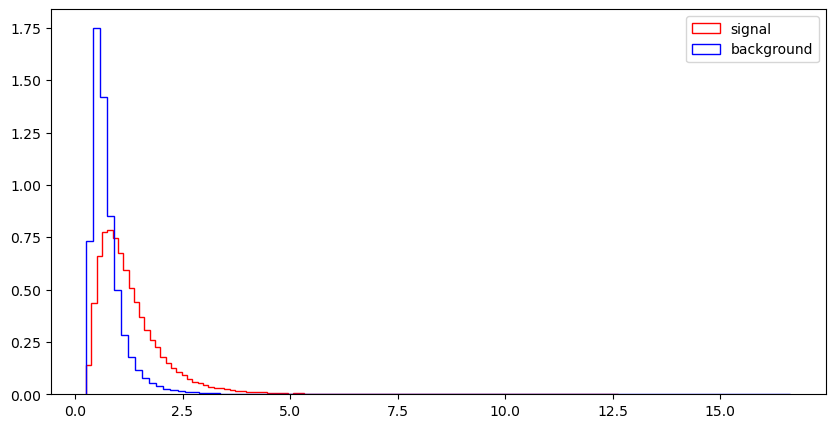

l_1_eta


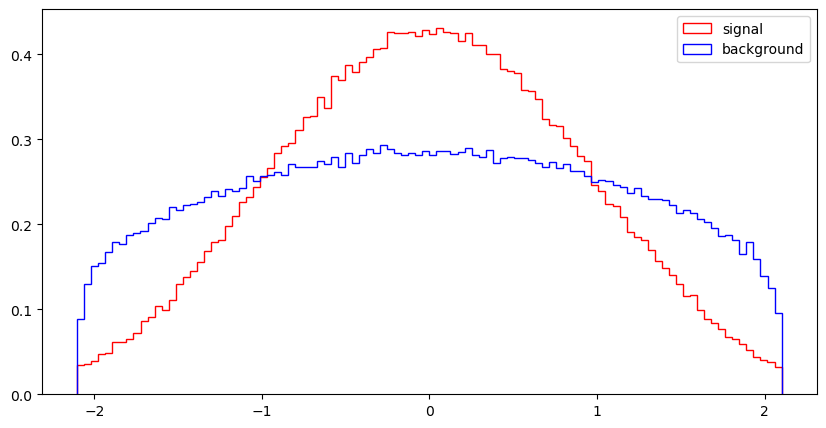

l_1_phi


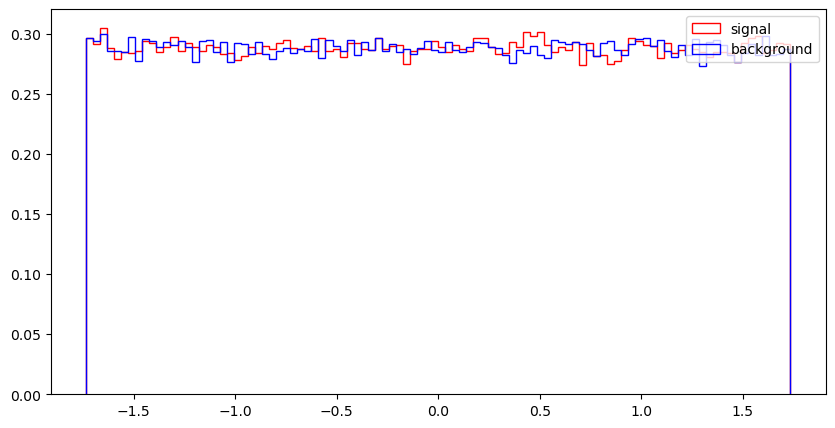

l_2_pT


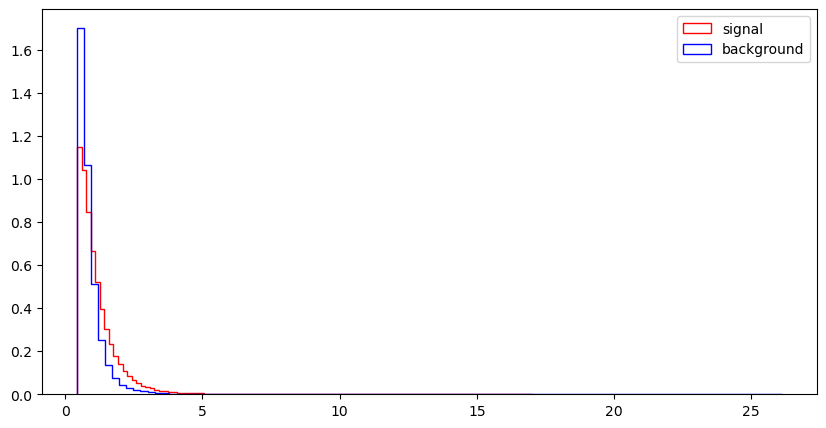

l_2_eta


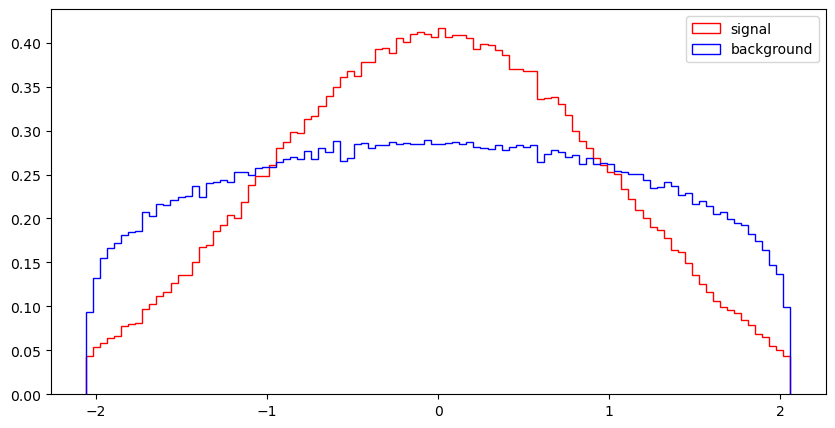

l_2_phi


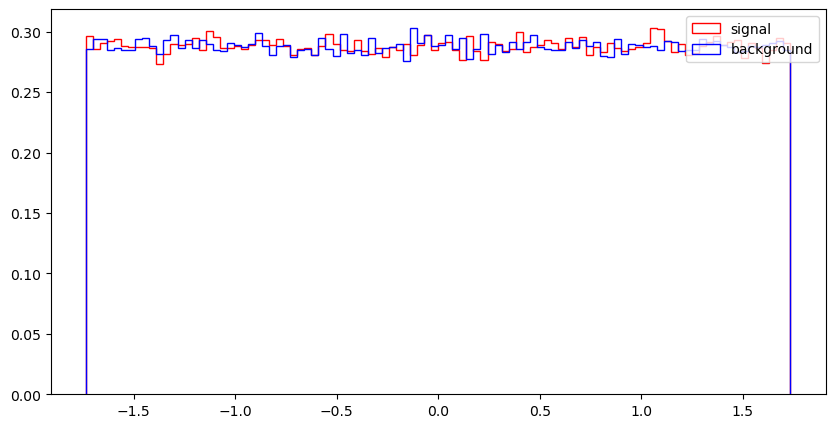

MET


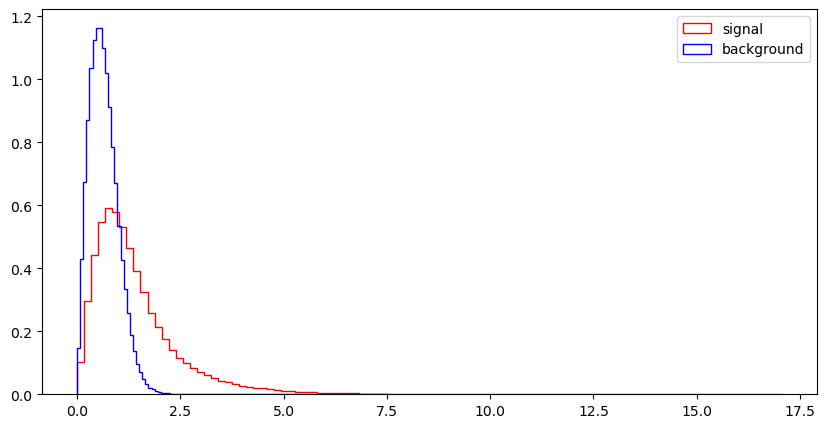

MET_phi


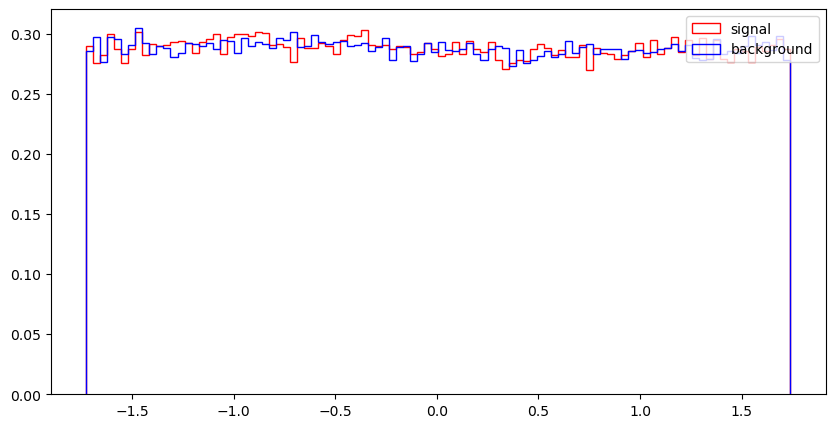

MET_rel


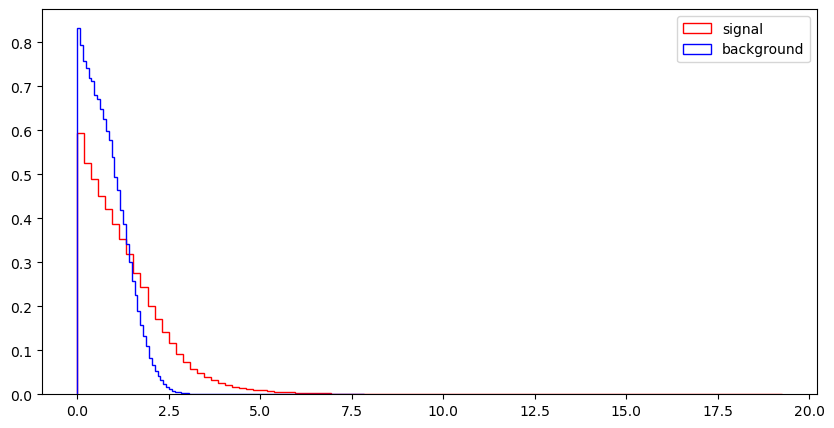

axial_MET


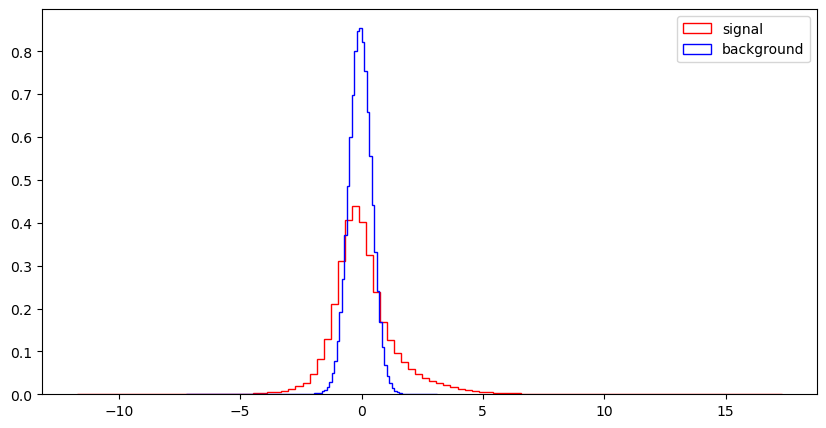

M_R


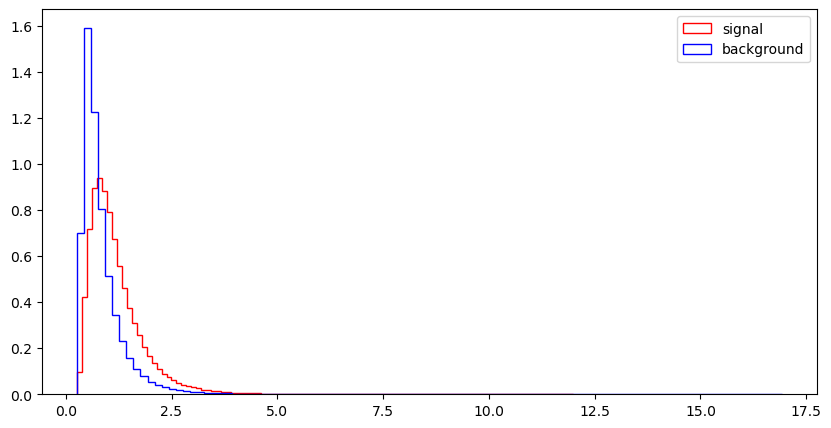

M_TR_2


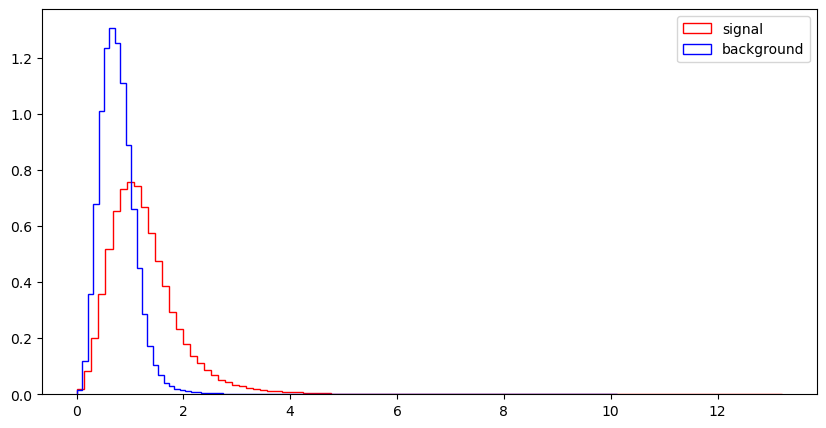

R


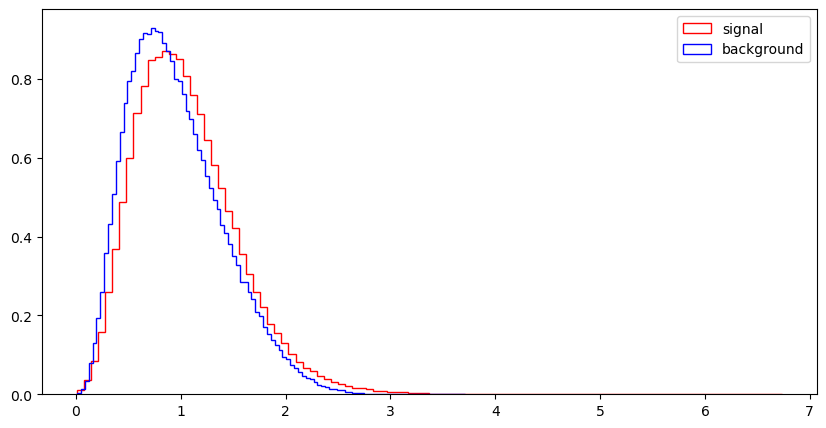

MT2


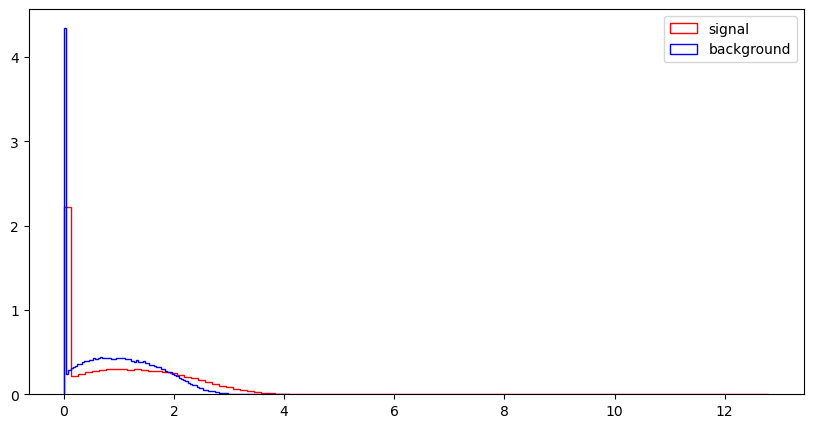

S_R


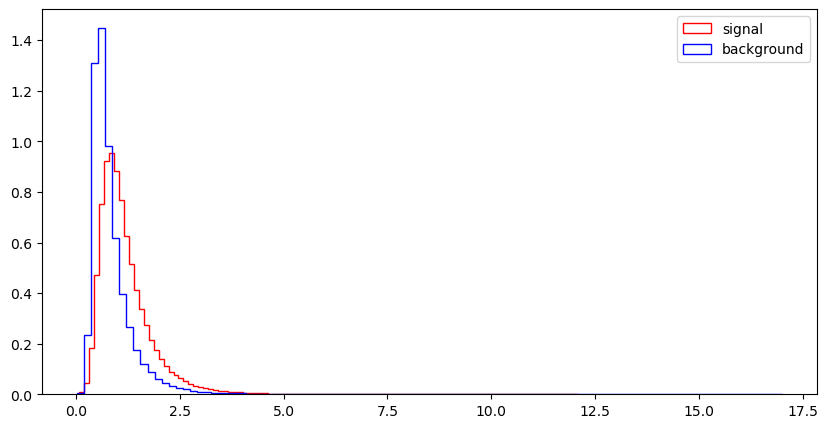

M_Delta_R


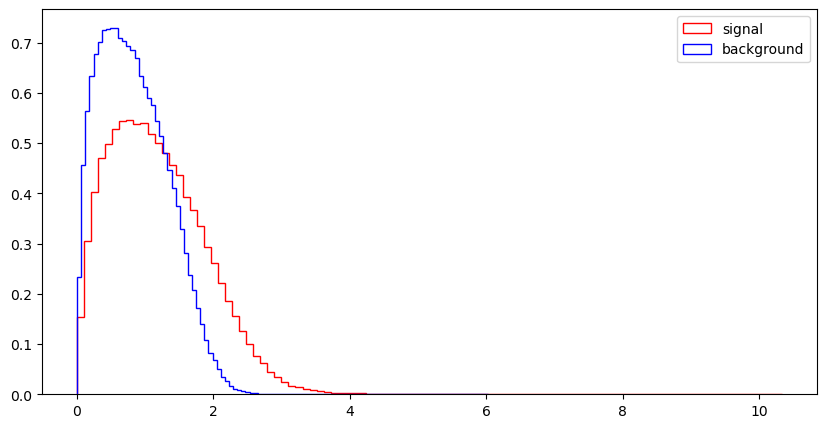

dPhi_r_b


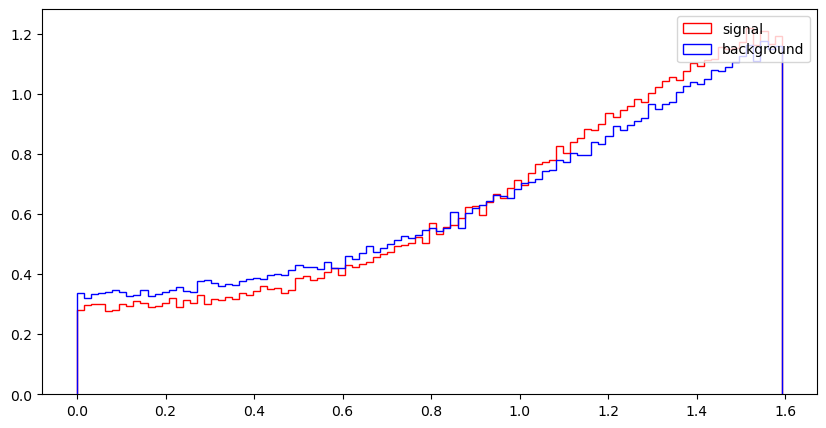

cos_theta_r1


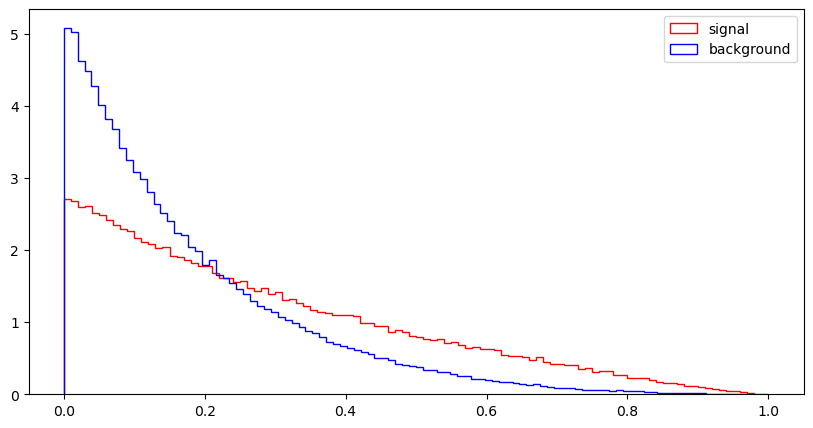

In [36]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

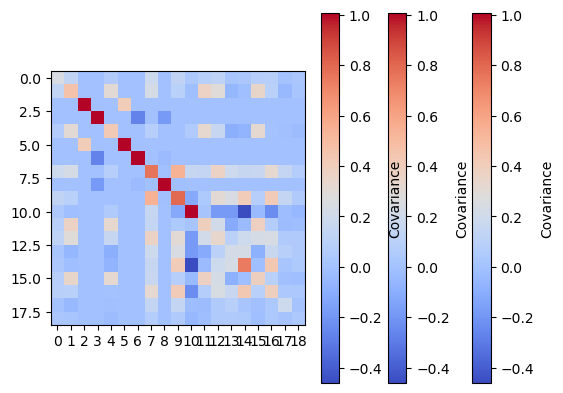

<Figure size 500x300 with 0 Axes>

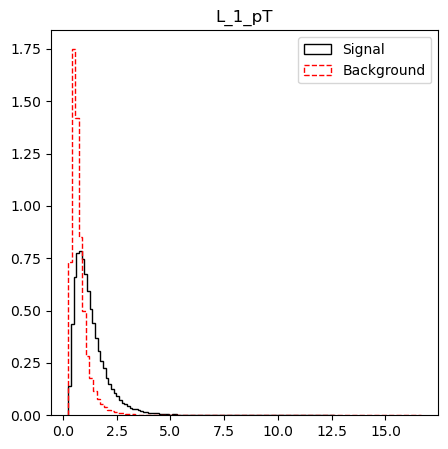

In [55]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['l_1_pT']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['l_1_pT']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("L_1_pT")
plt.show()

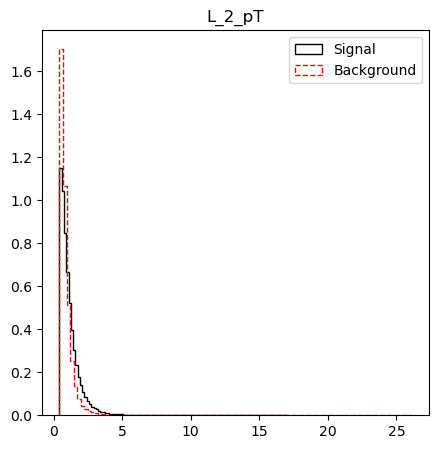

In [57]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['l_2_pT']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['l_2_pT']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("L_2_pT")
plt.show()

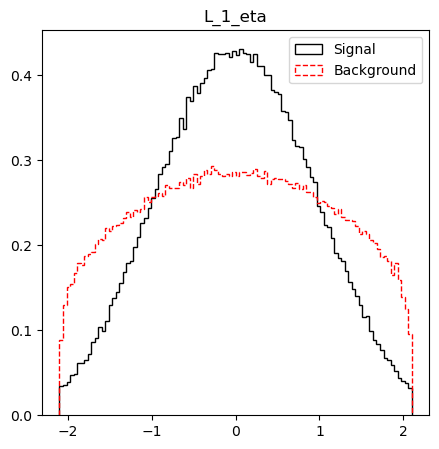

In [59]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['l_1_eta']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['l_1_eta']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("L_1_eta")
plt.show()

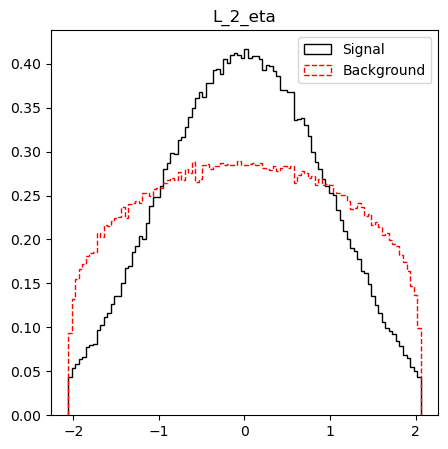

In [61]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['l_2_eta']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['l_2_eta']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("L_2_eta")
plt.show()

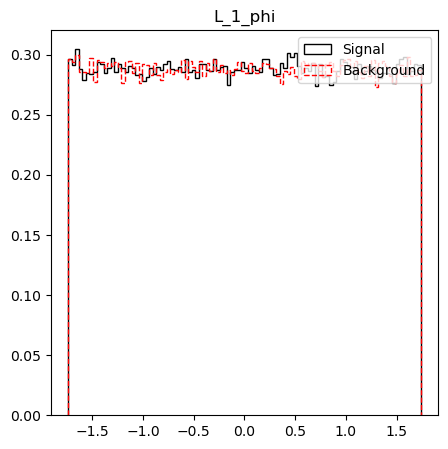

In [63]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['l_1_phi']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['l_1_phi']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("L_1_phi")
plt.show()

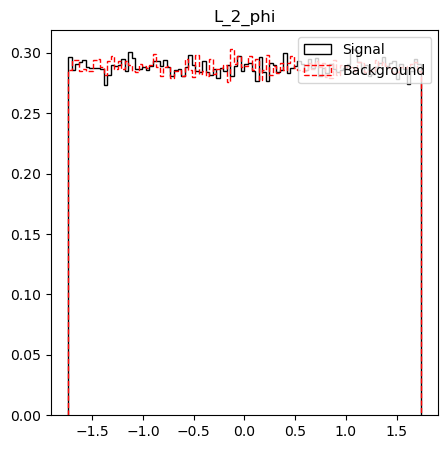

In [65]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['l_2_phi']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['l_2_phi']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("L_2_phi")
plt.show()

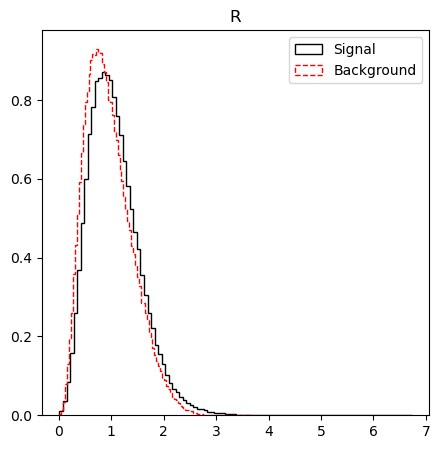

In [67]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['R']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['R']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("R")
plt.show()

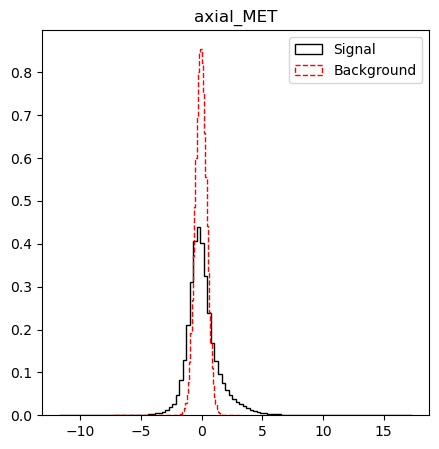

In [75]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['axial_MET']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['axial_MET']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("axial_MET")
plt.show()

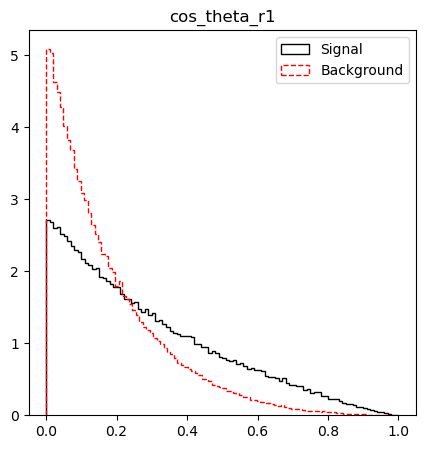

In [77]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['cos_theta_r1']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['cos_theta_r1']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("cos_theta_r1")
plt.show()

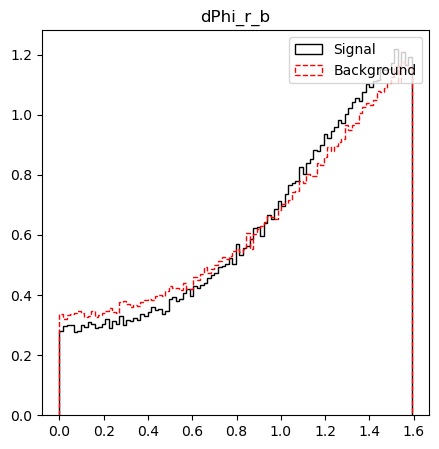

In [79]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['dPhi_r_b']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['dPhi_r_b']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("dPhi_r_b")
plt.show()

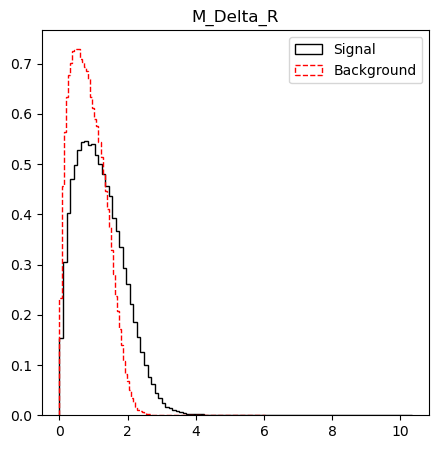

In [81]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['M_Delta_R']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['M_Delta_R']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("M_Delta_R")
plt.show()

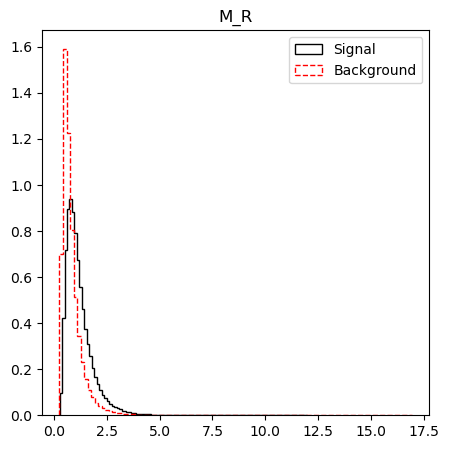

In [83]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['M_R']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['M_R']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("M_R")
plt.show()

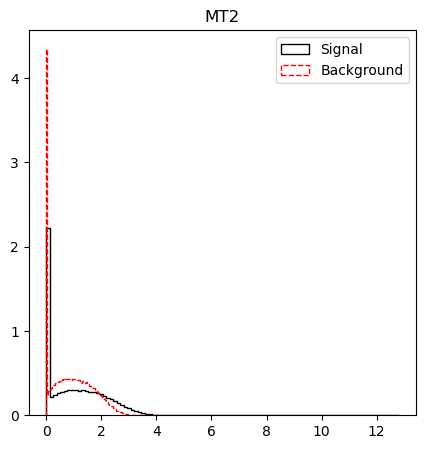

In [85]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['MT2']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['MT2']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("MT2")
plt.show()

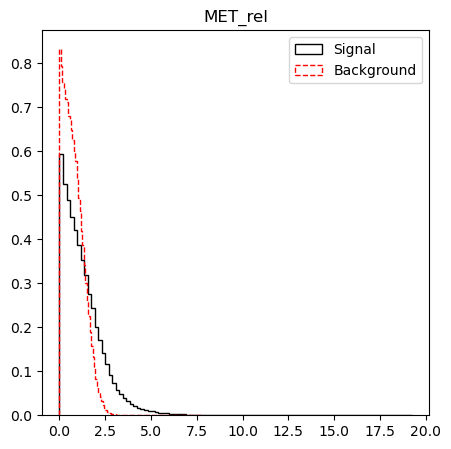

In [87]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['MET_rel']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['MET_rel']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("MET_rel")
plt.show()

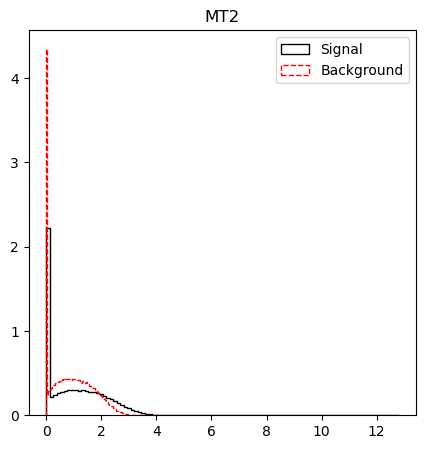

In [89]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['MT2']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['MT2']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("MT2")
plt.show()

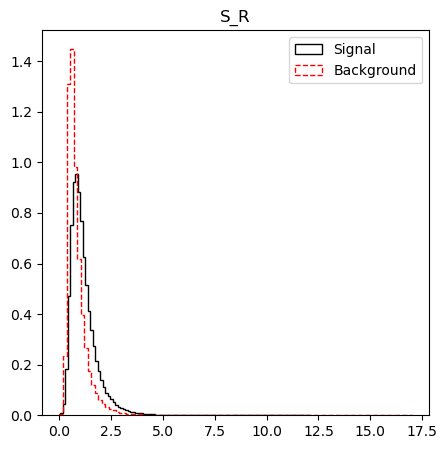

In [91]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['S_R']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['S_R']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("S_R")
plt.show()

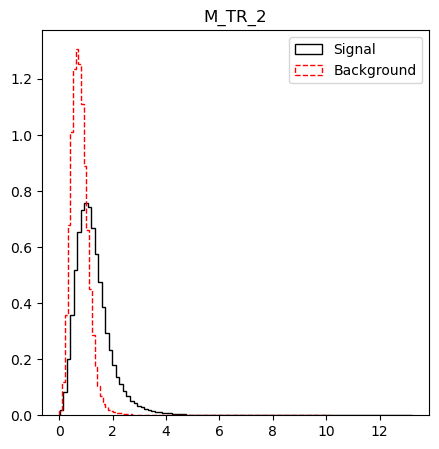

In [93]:
plt.figure(figsize=(5,5))
plt.hist(np.array(df_sig['M_TR_2']),bins=100,histtype='step',color="black", label="Signal",density=1, stacked=True)
plt.hist(np.array(df_bkg['M_TR_2']),bins=100,histtype='step',color="red", linestyle='dashed', label="Background",density=1, stacked=True)
plt.legend(loc='upper right')
plt.title("M_TR_2")
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

# Maybe M_TR_2 and the l_1/2_pT plot shows more correlation. The R and the l_1/2_pT shows something like a exponential decay graph. S_R and M_R have super high positive correlation. 

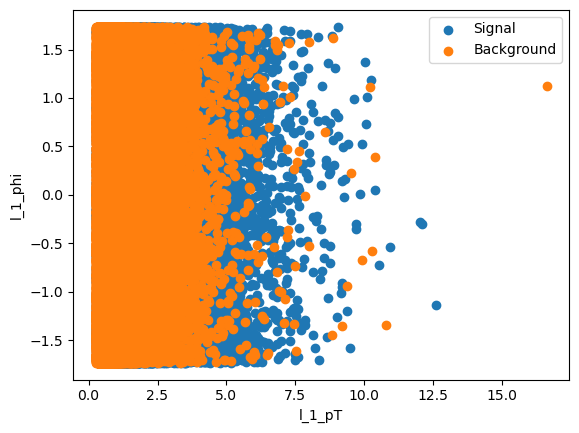

In [95]:
selection_dict = {"Signal": df_sig, "Background": df_bkg}
for label, selection in selection_dict.items():
    plt.scatter(selection["l_1_pT"], selection["l_1_phi"], label=label)
plt.xlabel("l_1_pT")
plt.ylabel("l_1_phi")
plt.legend()
plt.show()

In [97]:
def pair_plot(df, x_var_name, y_var_name, selections, make_legend=True):
    for label, selection in selection_dict.items():
        plt.scatter(selection[x_var_name], selection[y_var_name], label=label)
    plt.xlabel(x_var_name)
    plt.ylabel(y_var_name)

    if make_legend:
        plt.legend(loc="upper right")


In [99]:
pair_plot(df, "l_1_pT", "l_1_phi", selection_dict)

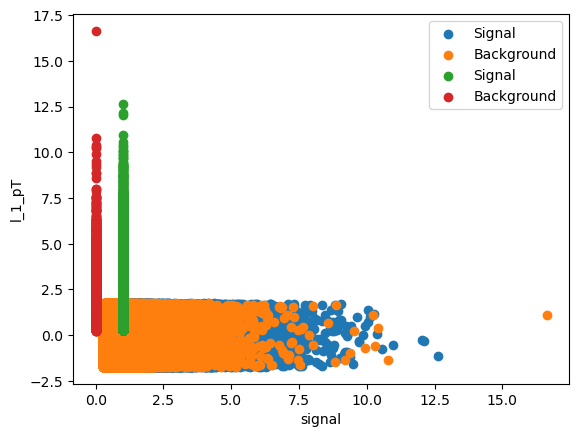

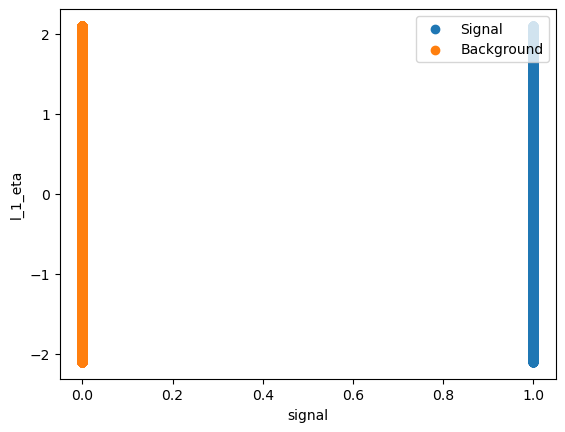

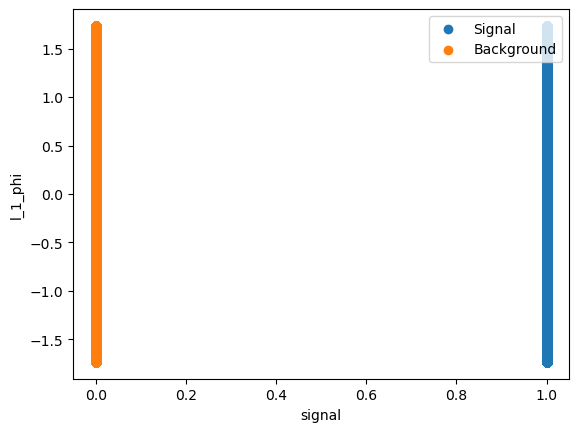

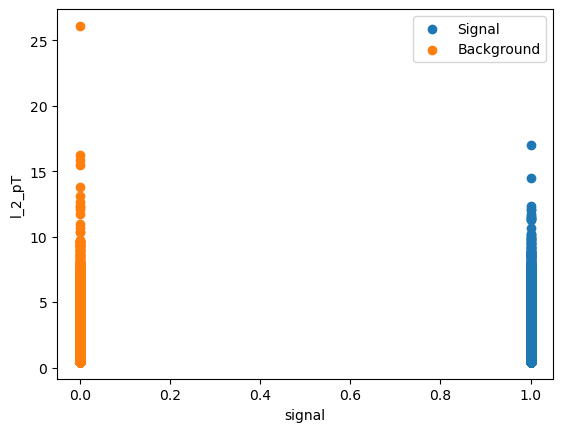

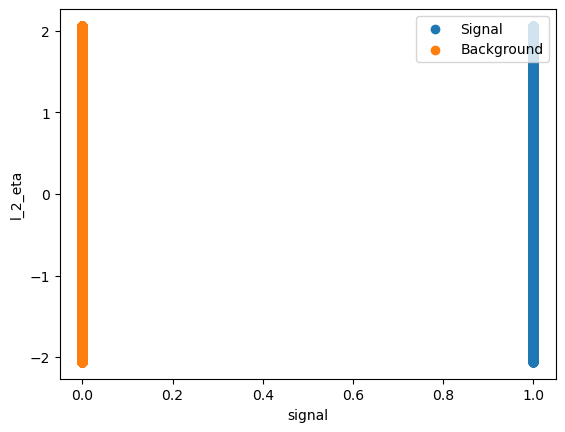

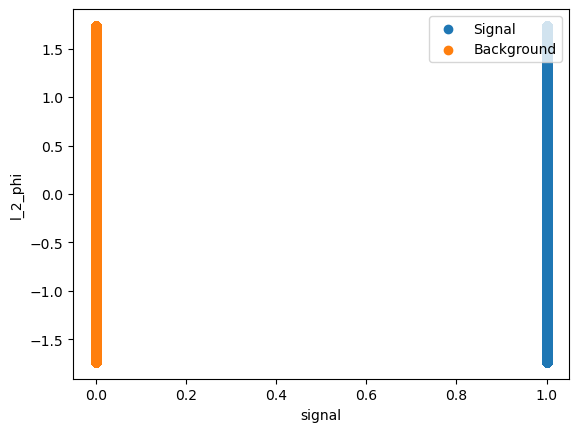

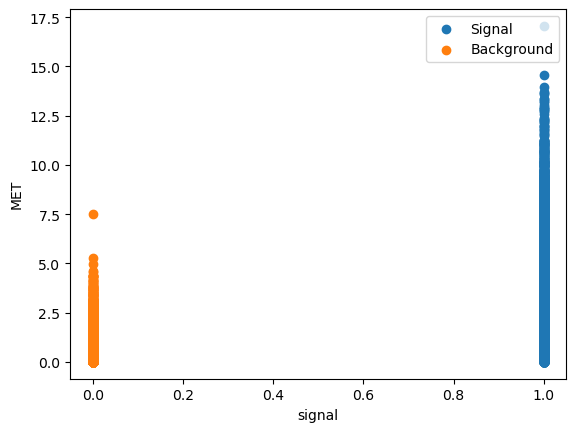

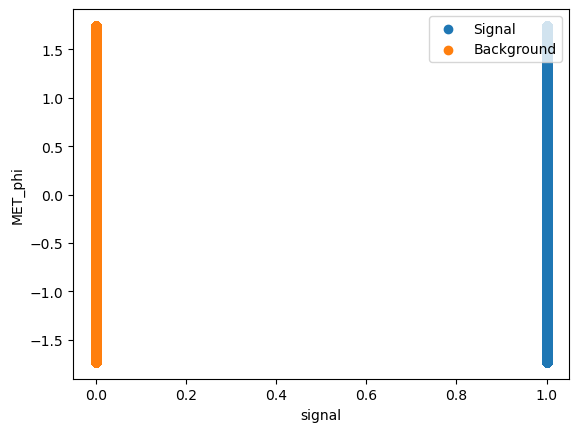

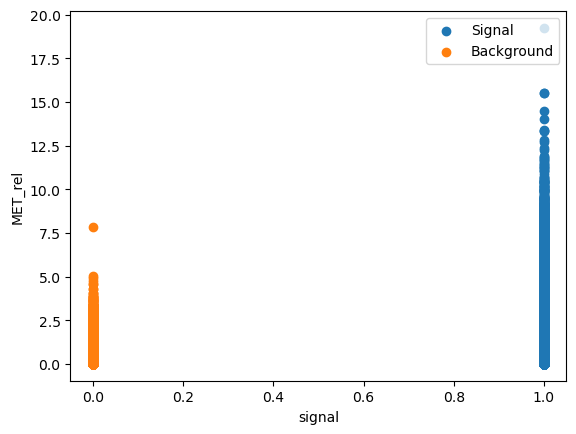

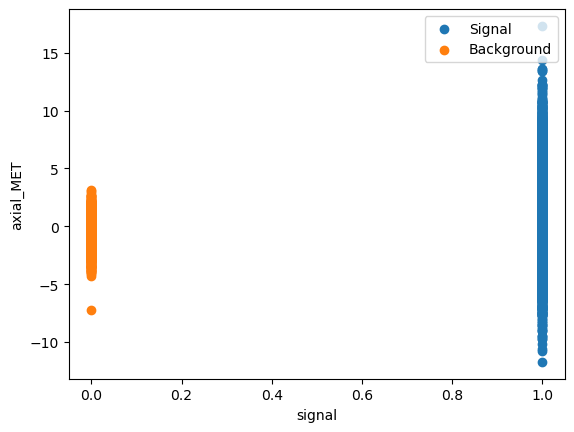

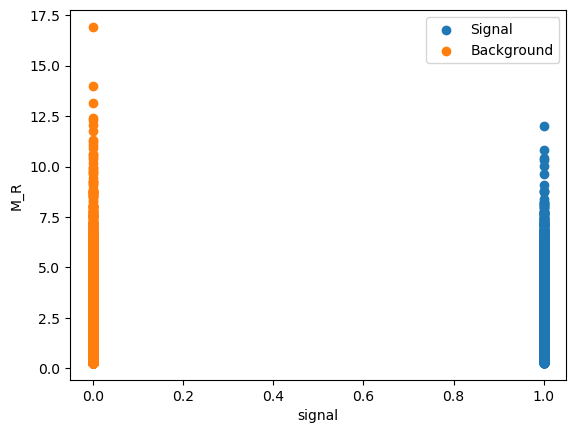

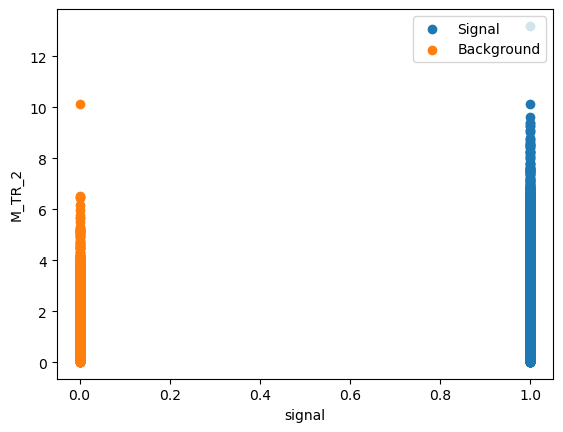

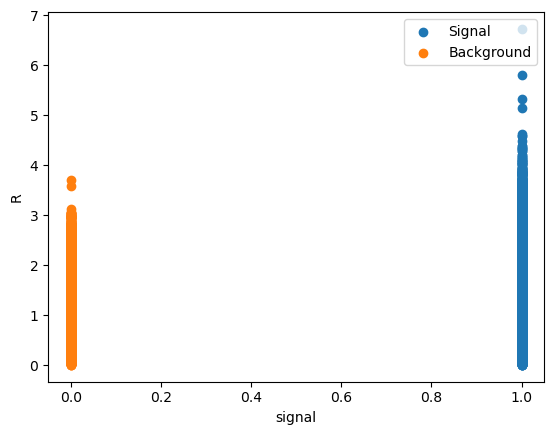

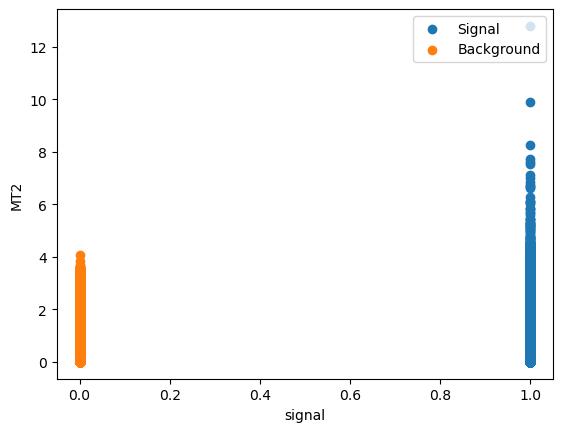

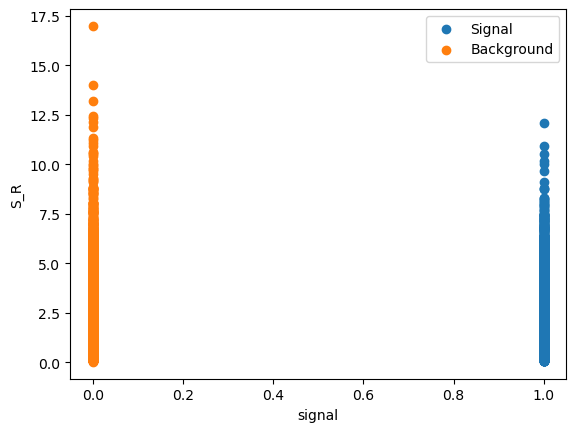

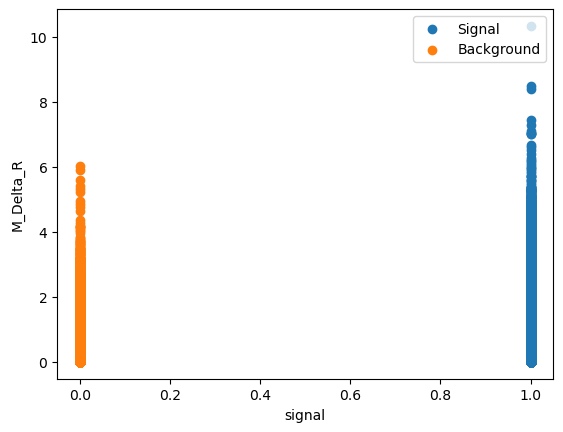

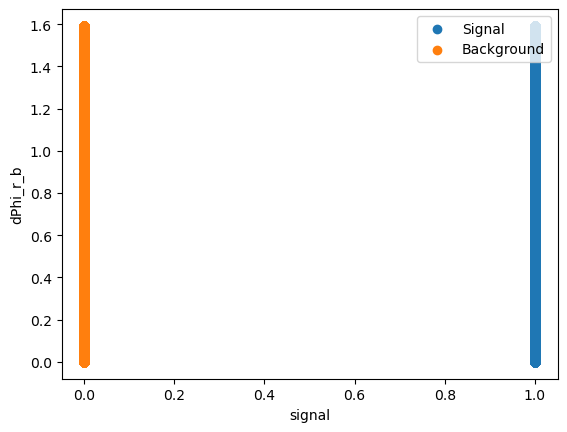

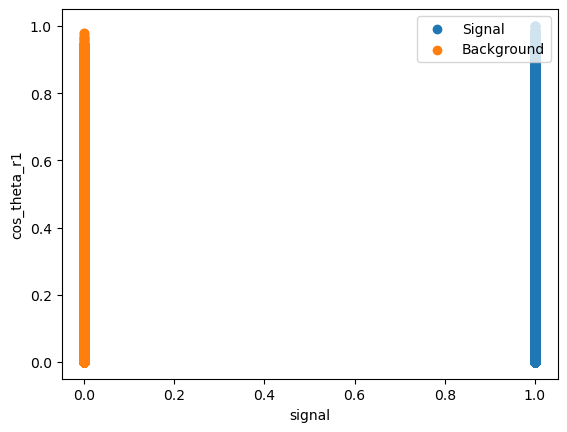

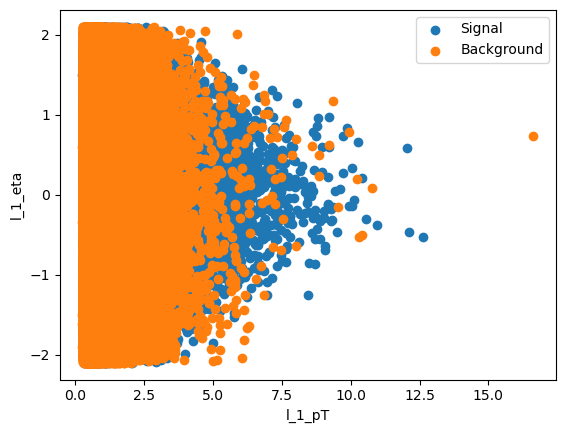

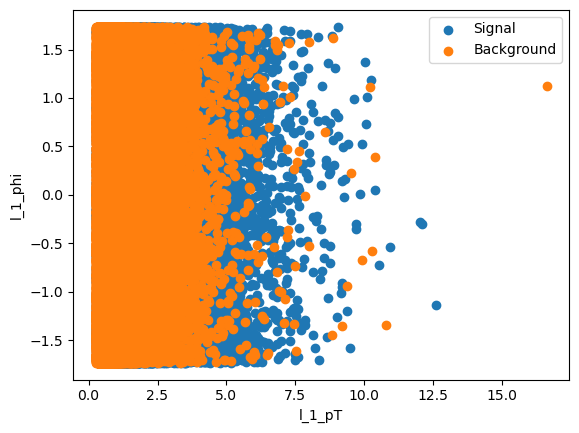

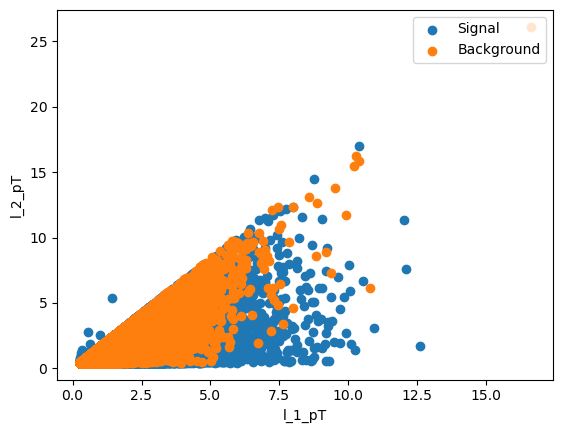

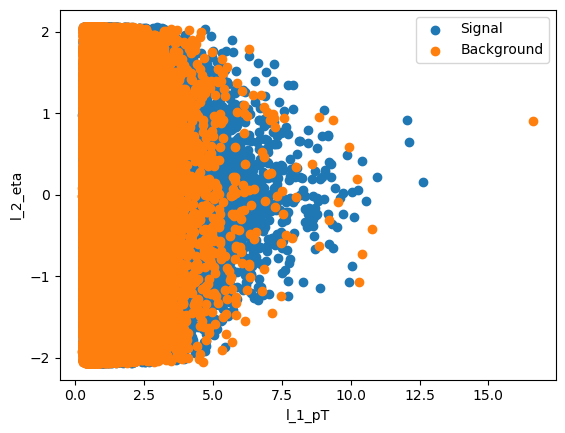

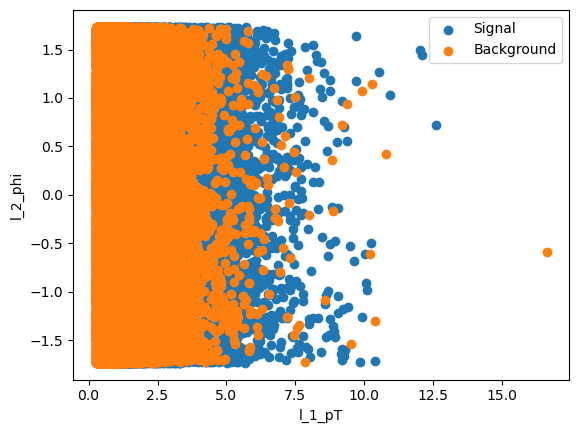

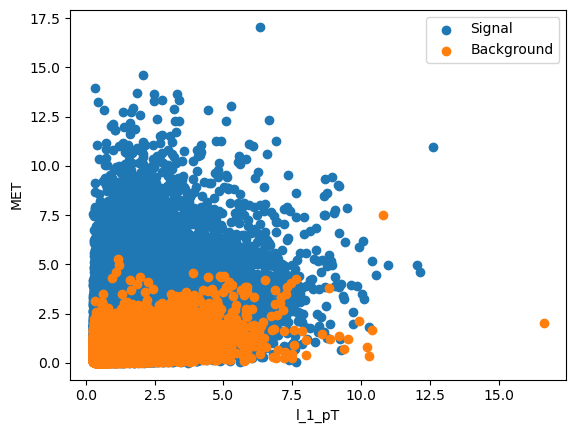

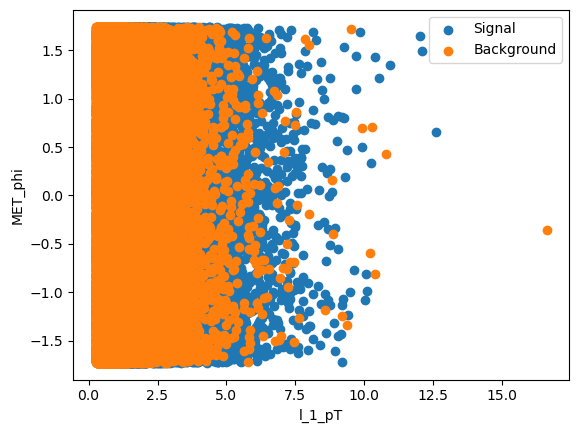

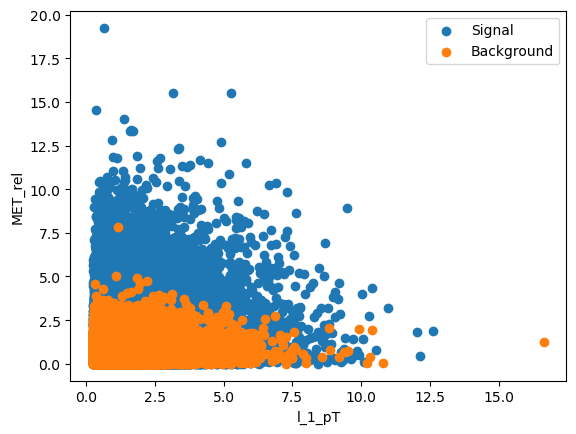

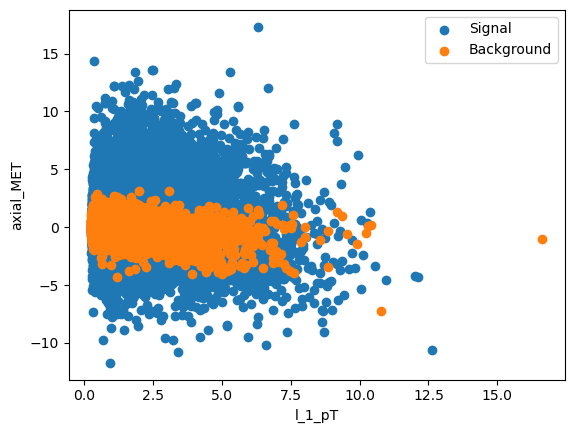

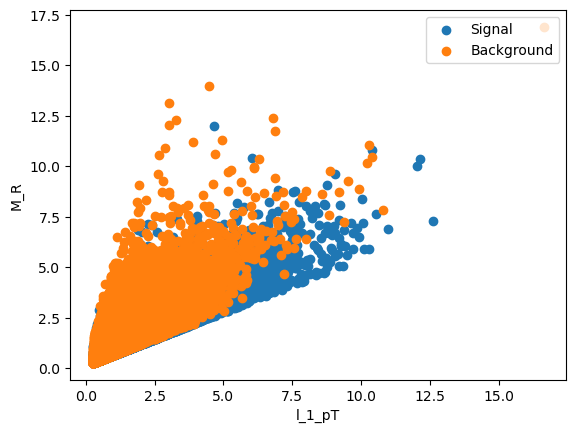

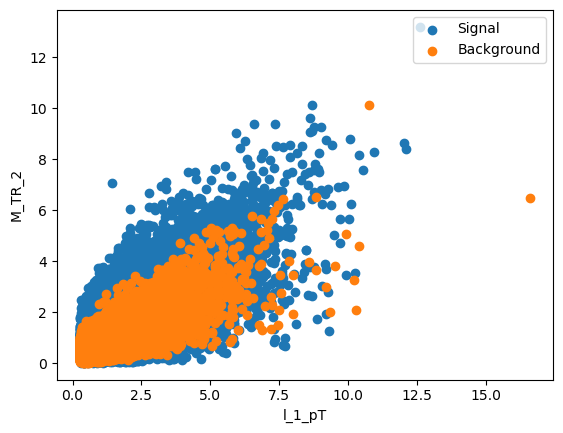

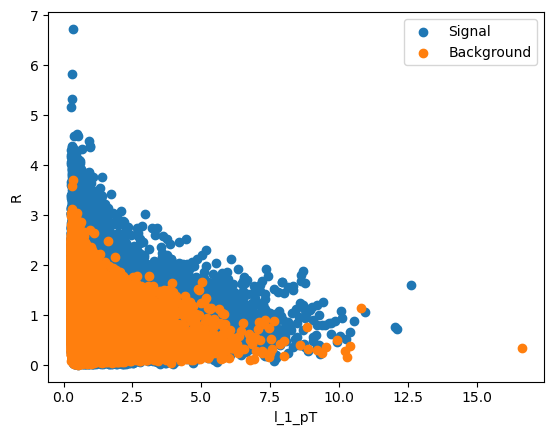

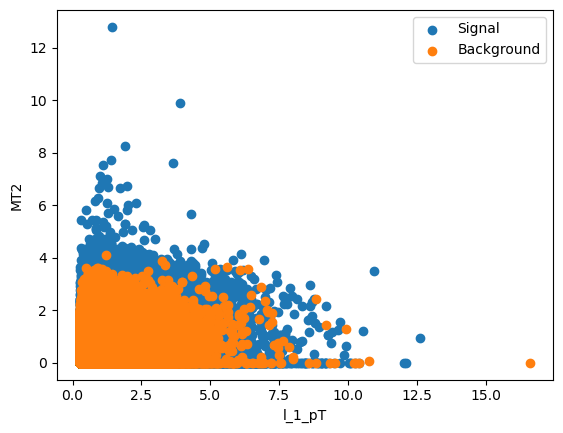

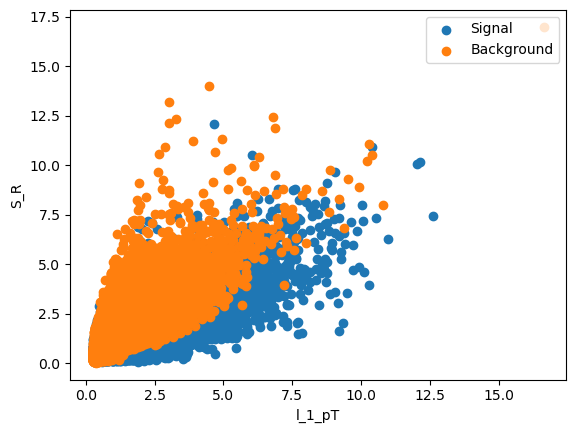

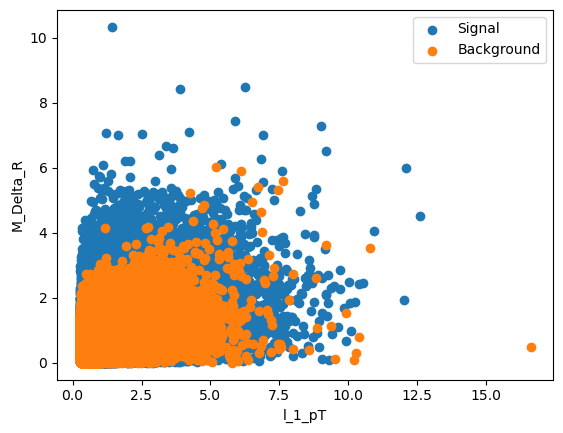

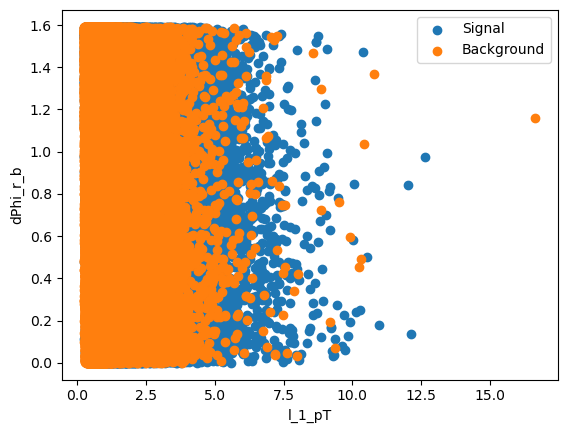

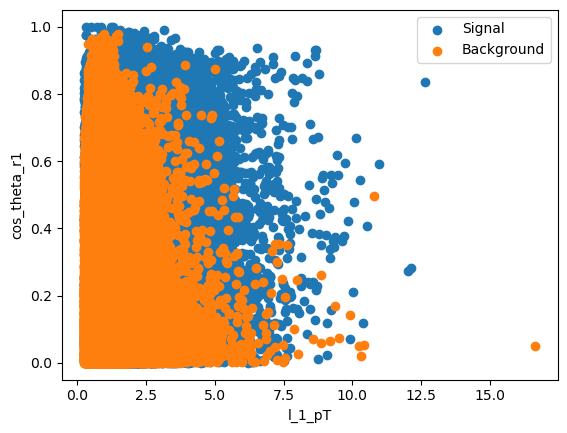

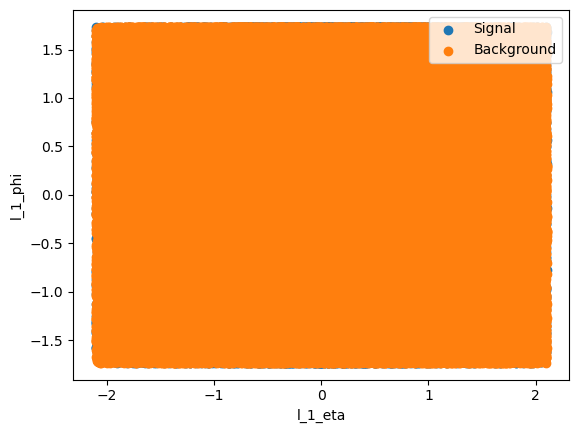

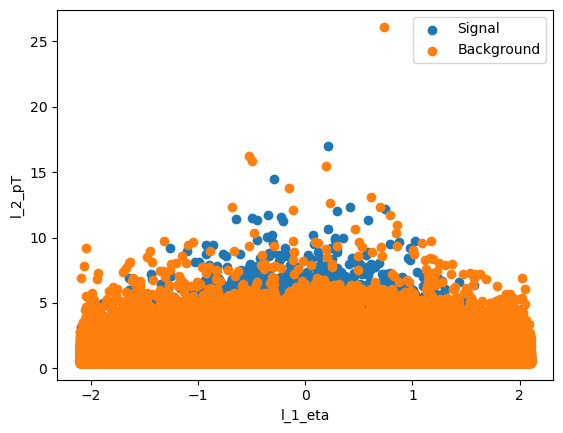

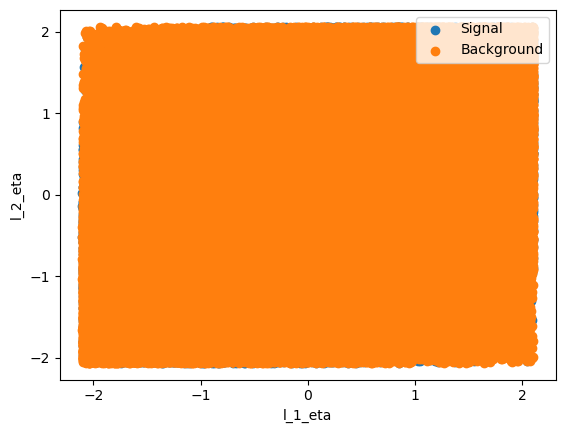

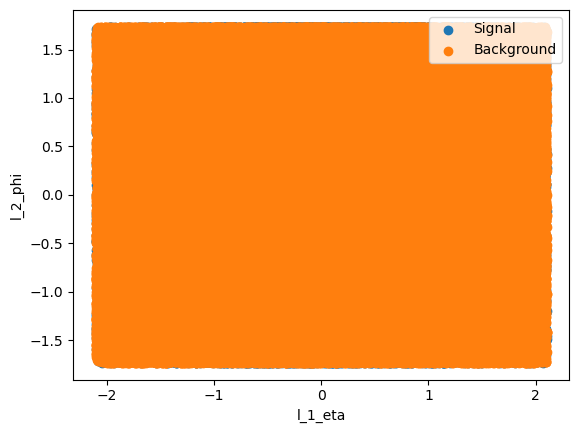

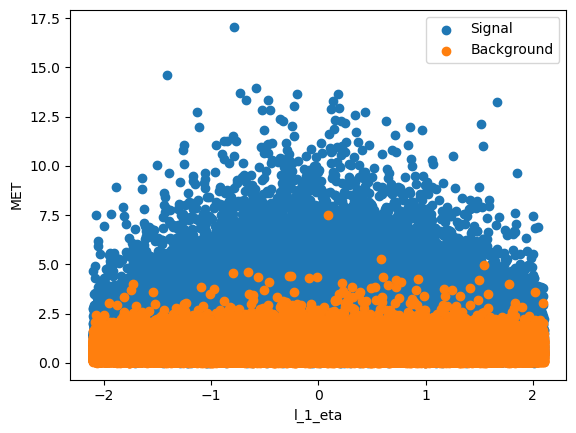

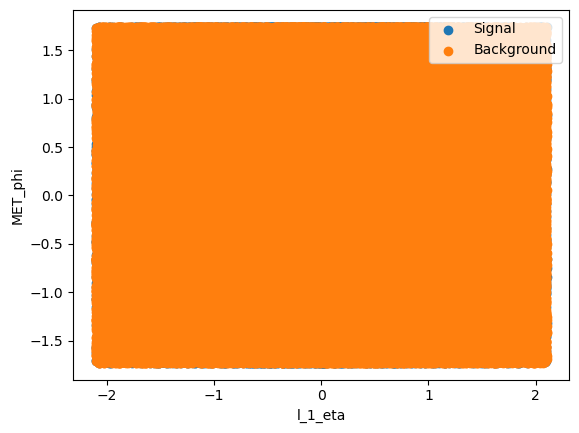

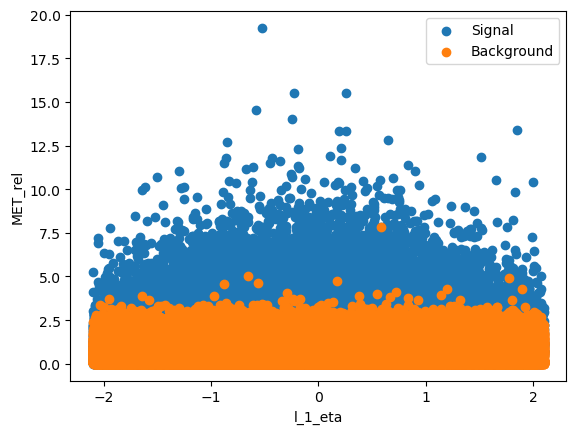

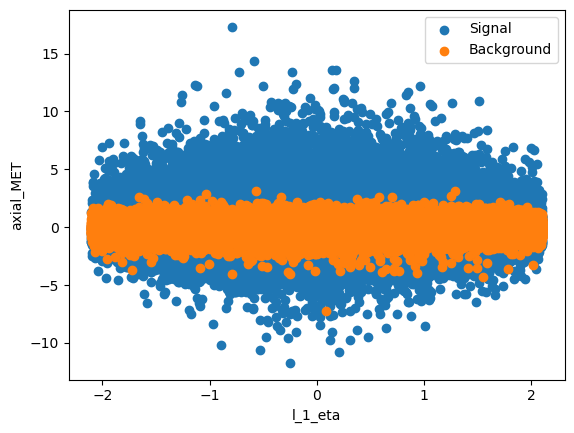

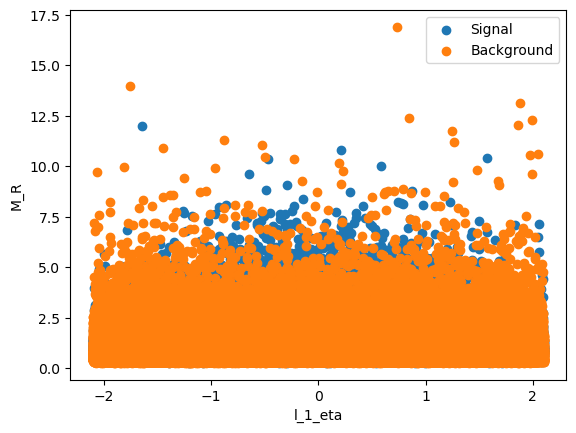

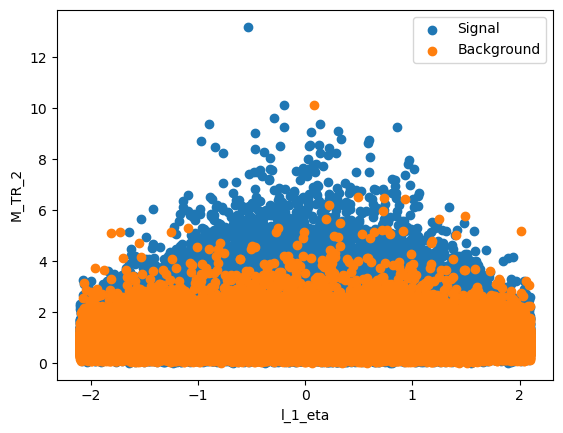

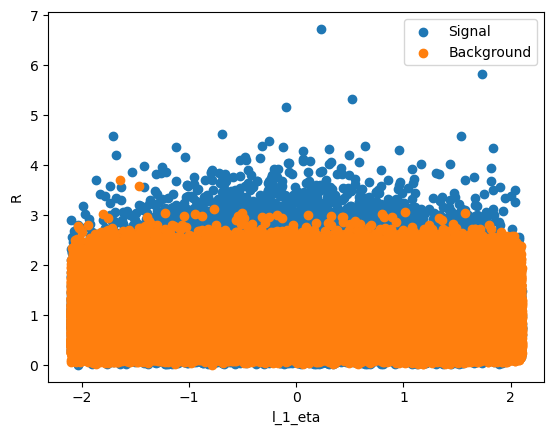

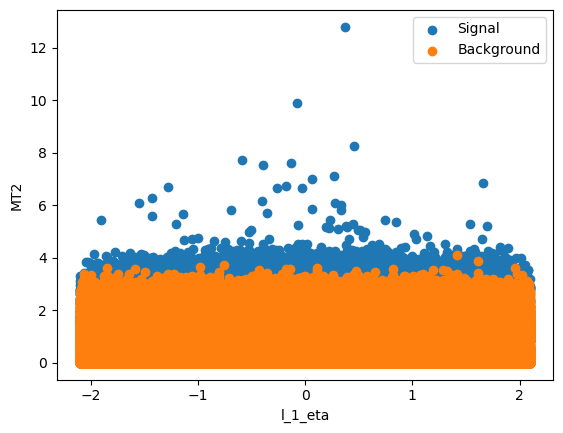

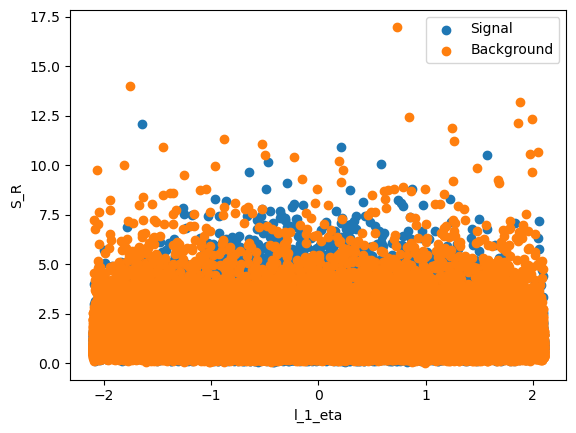

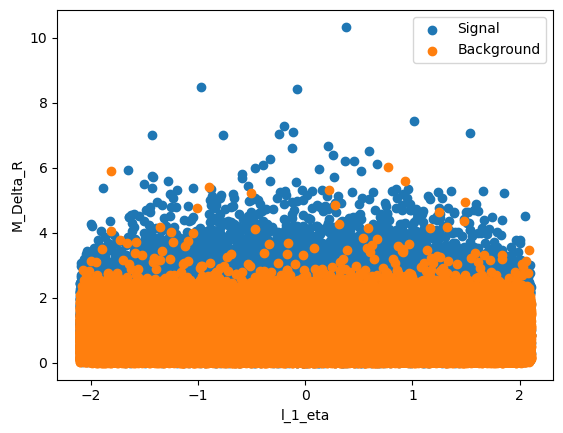

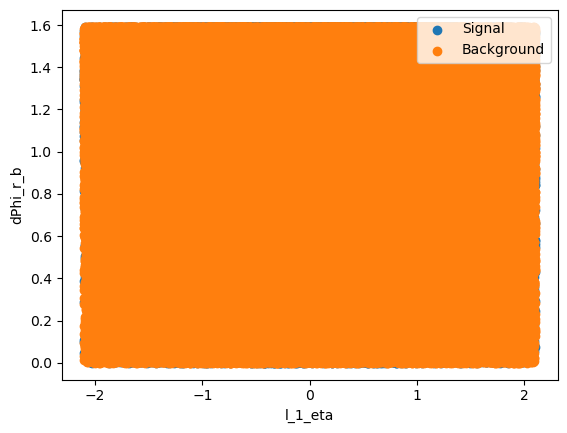

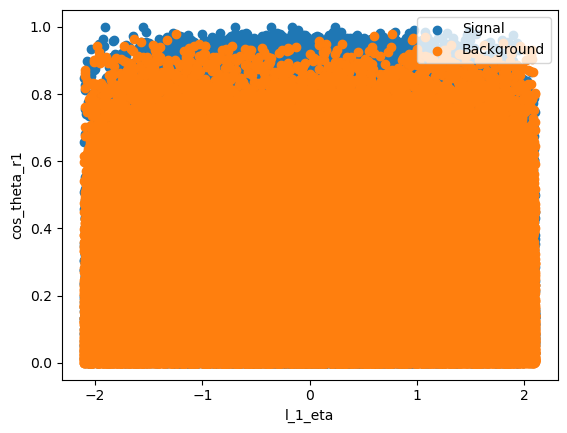

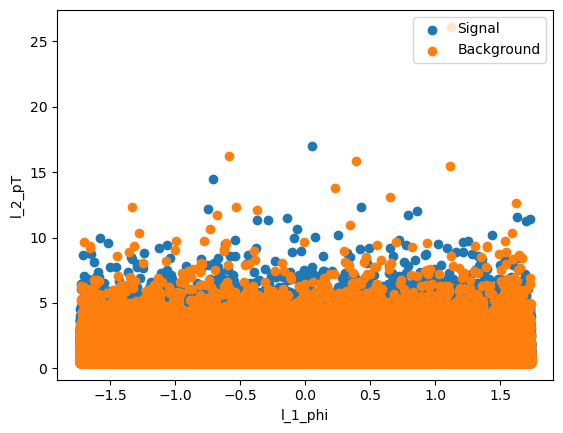

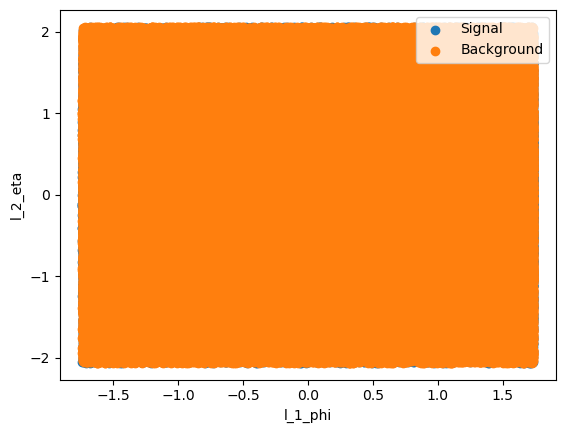

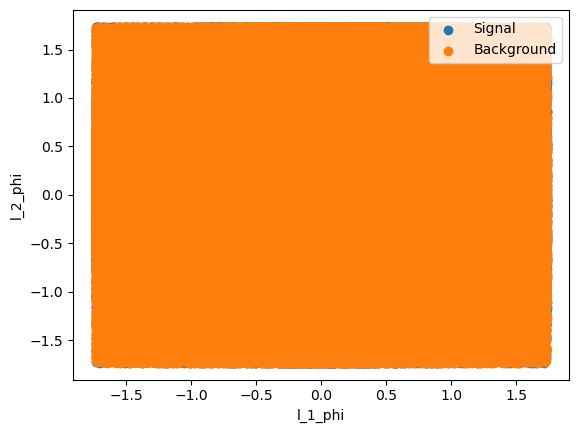

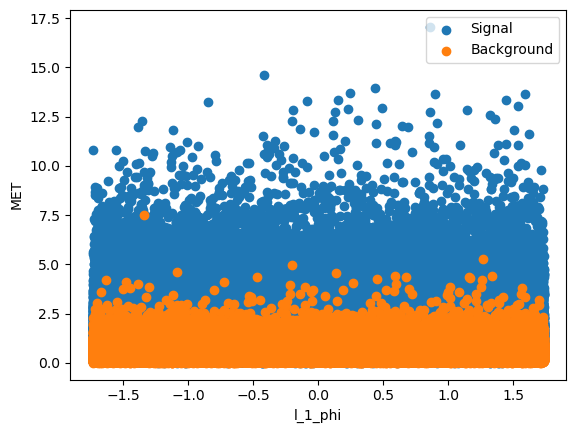

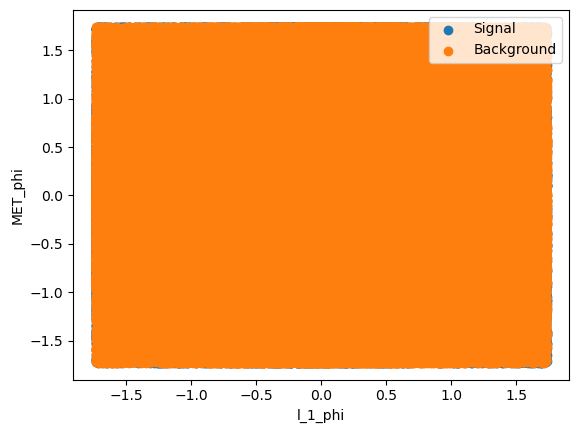

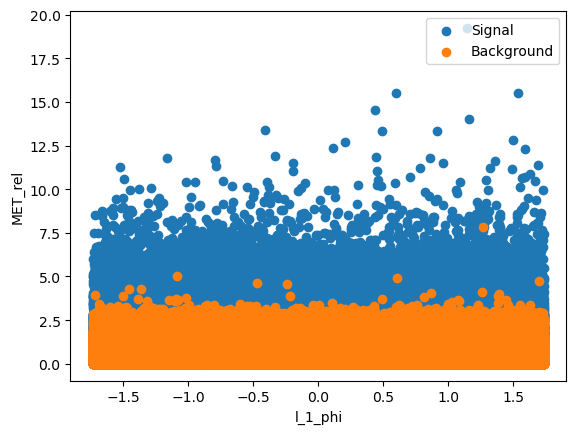

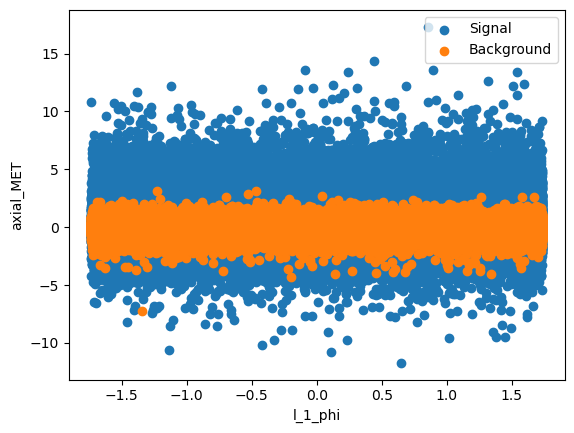

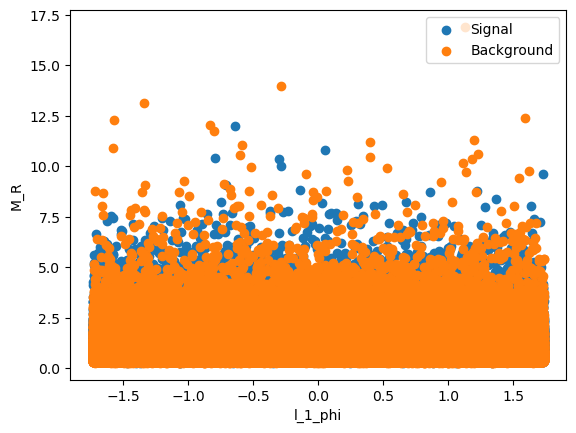

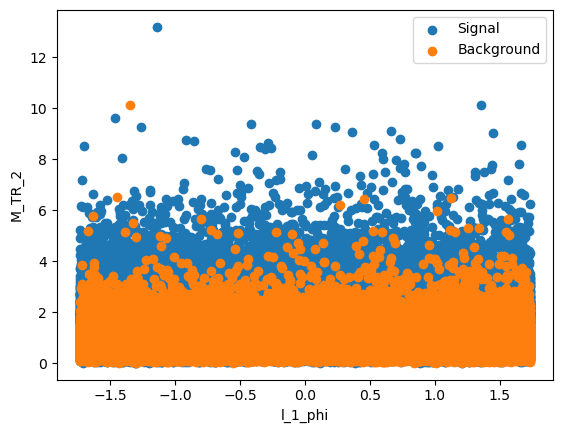

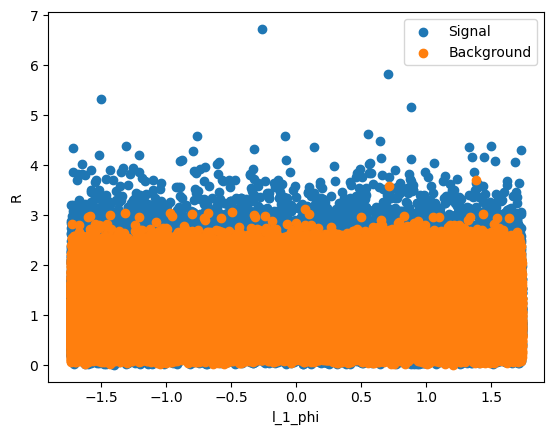

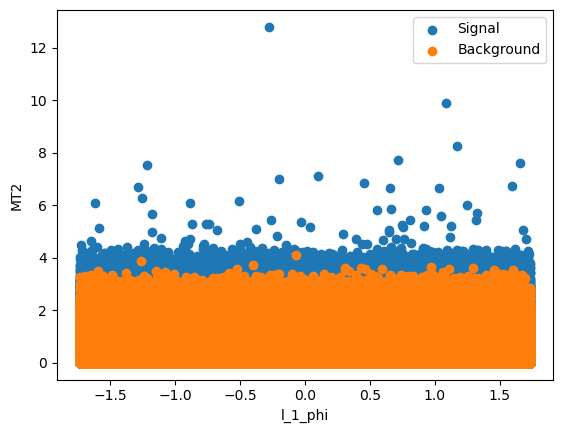

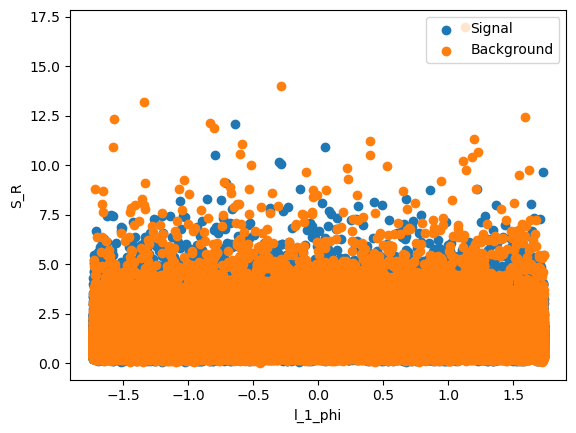

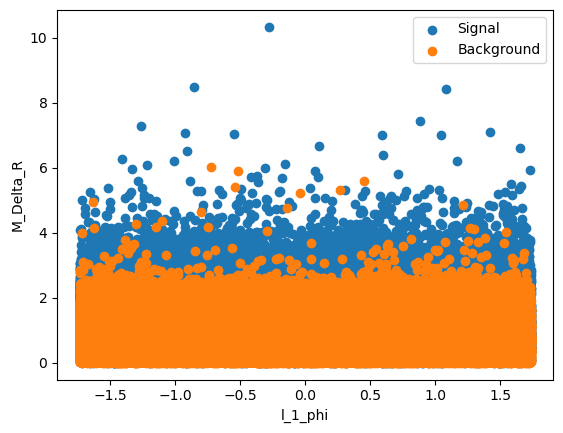

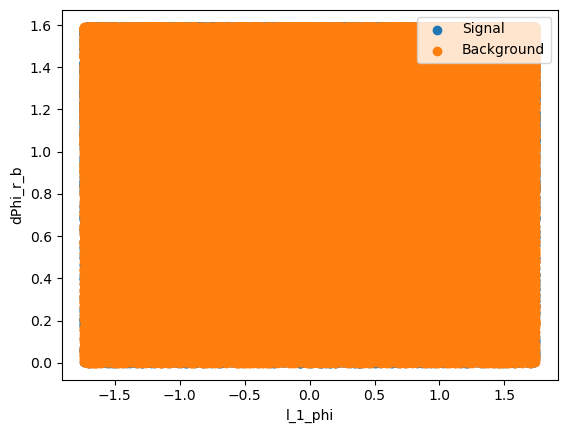

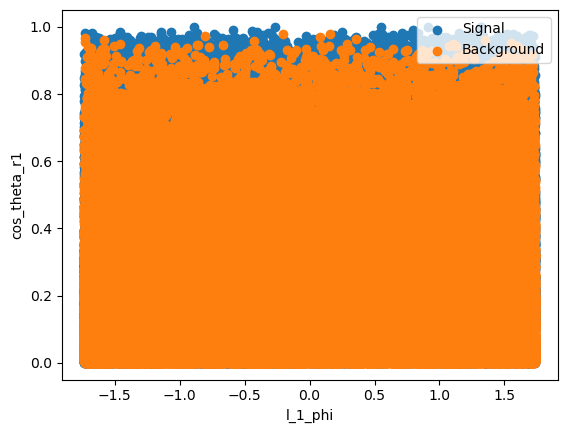

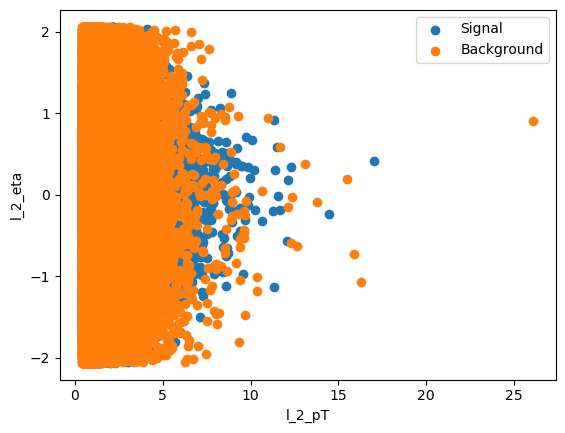

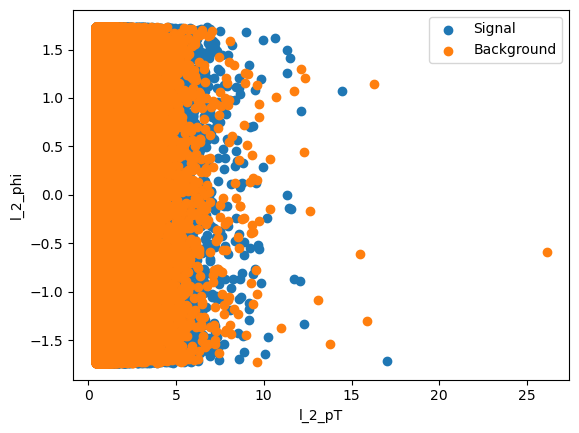

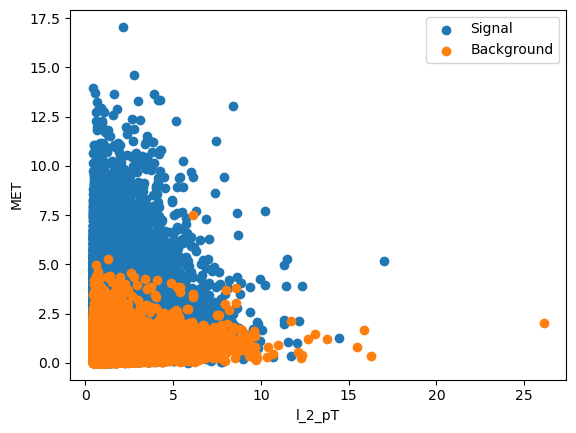

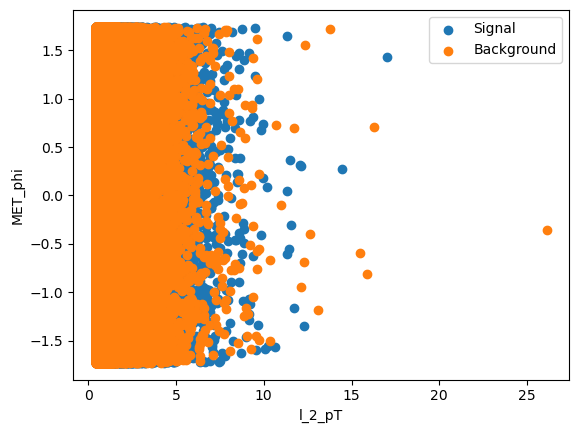

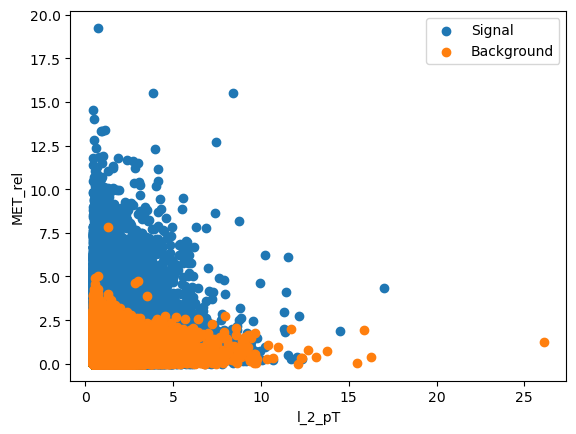

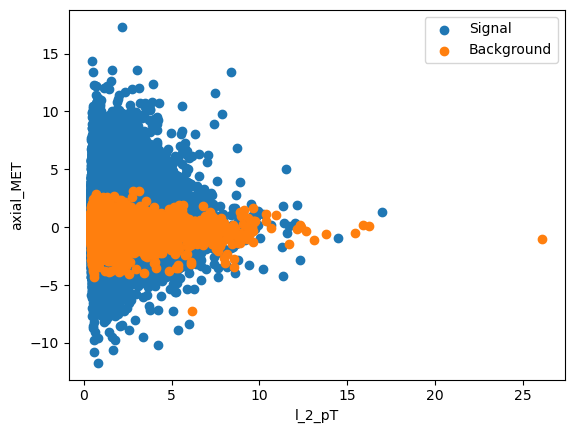

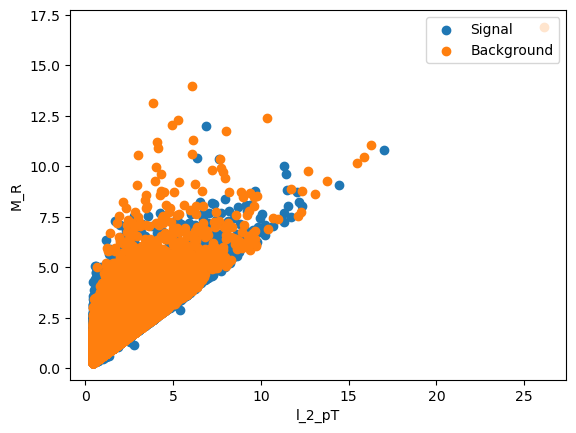

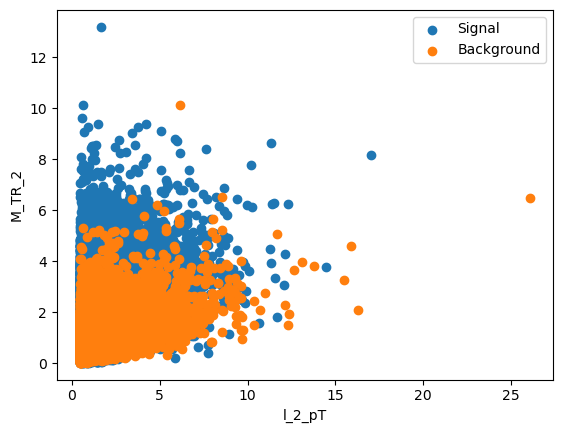

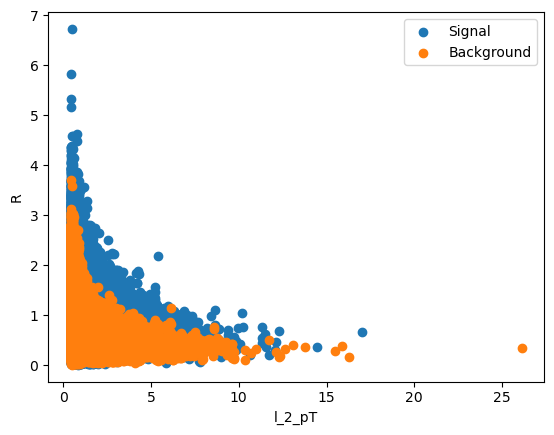

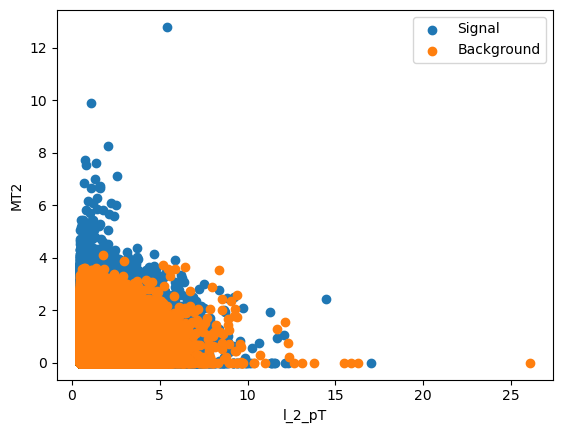

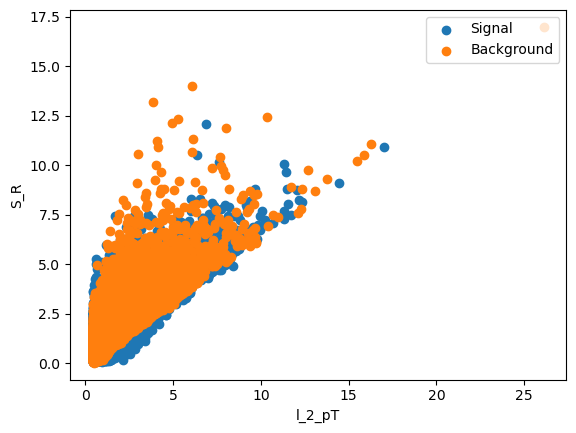

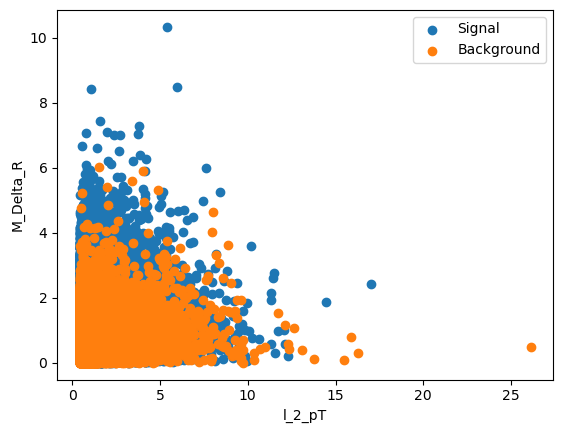

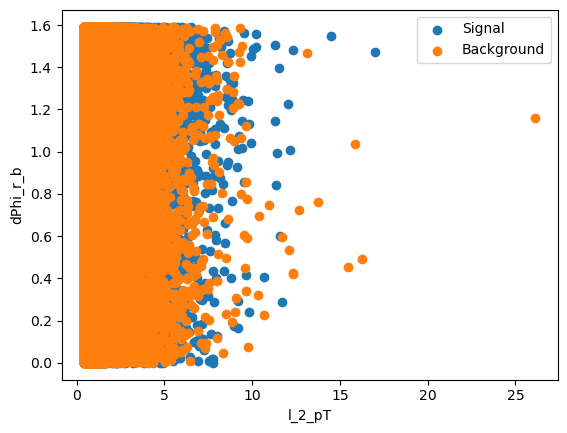

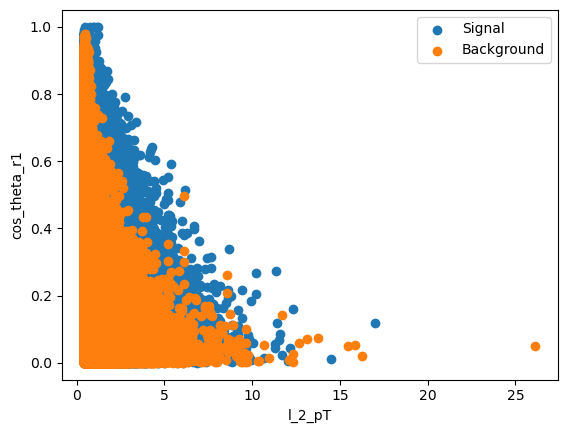

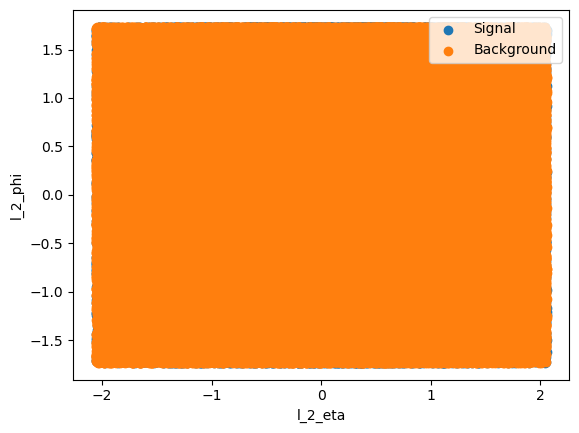

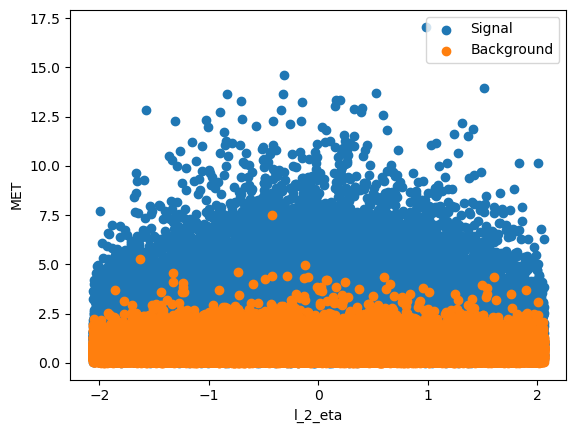

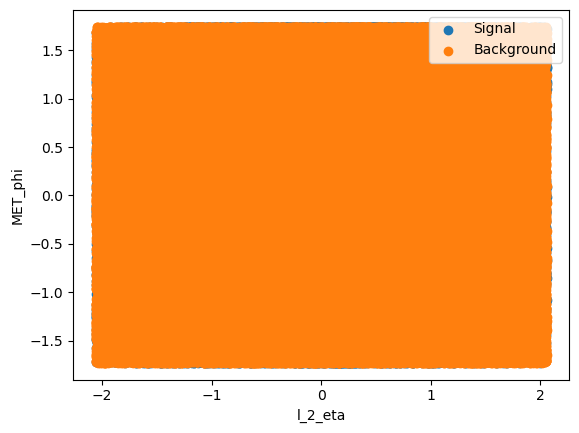

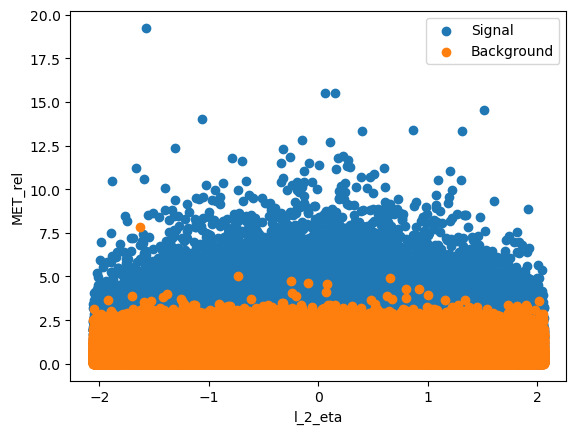

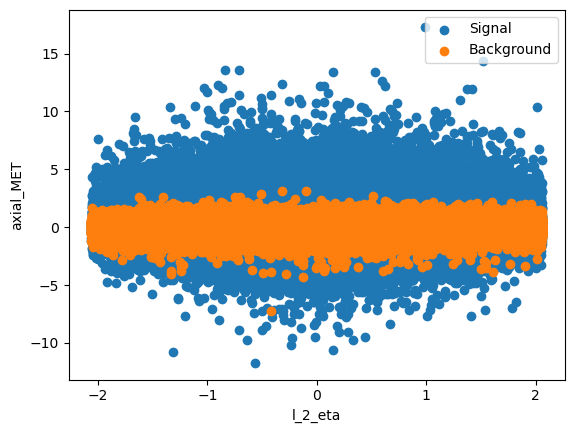

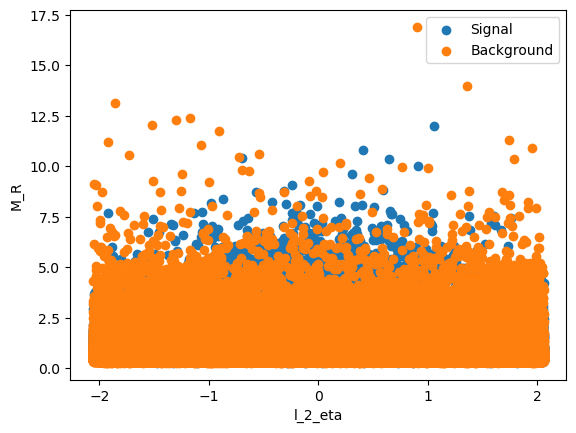

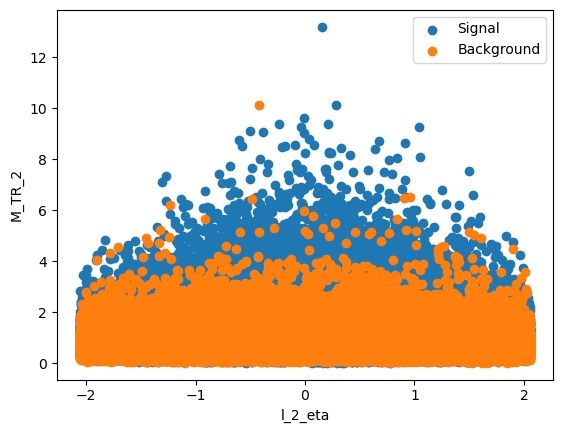

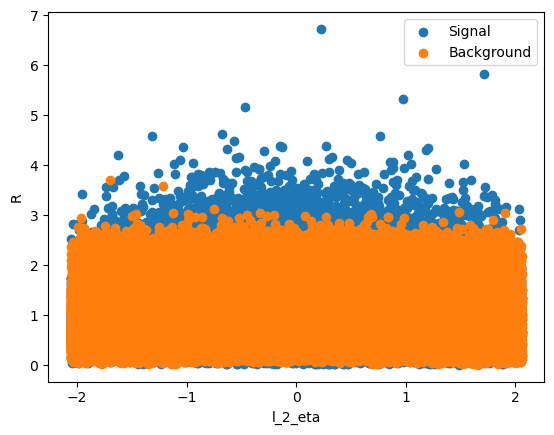

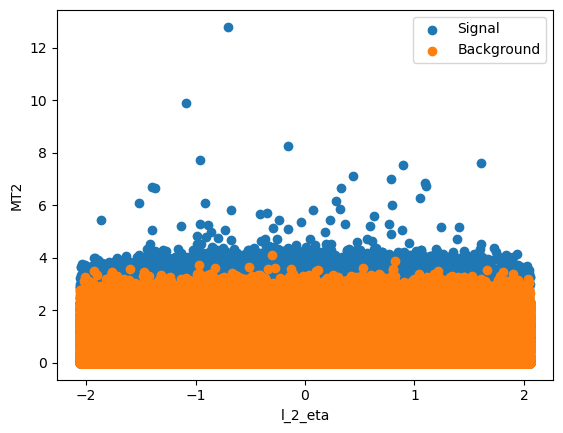

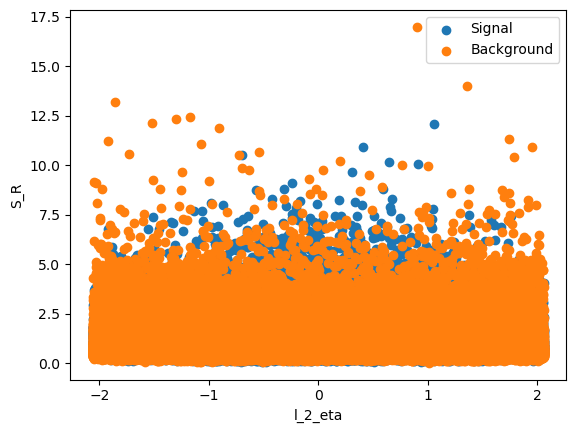

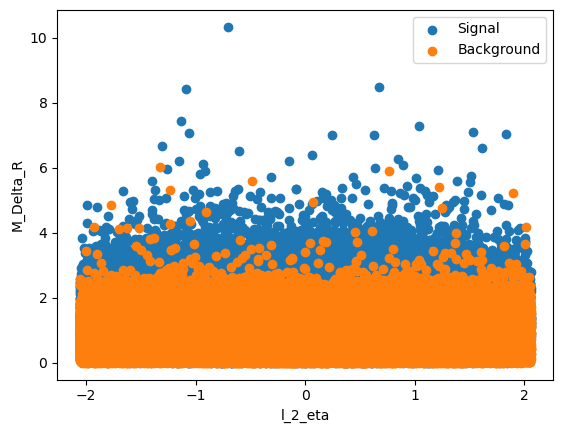

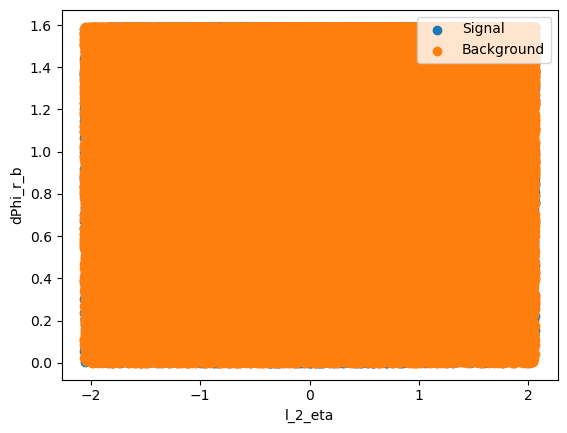

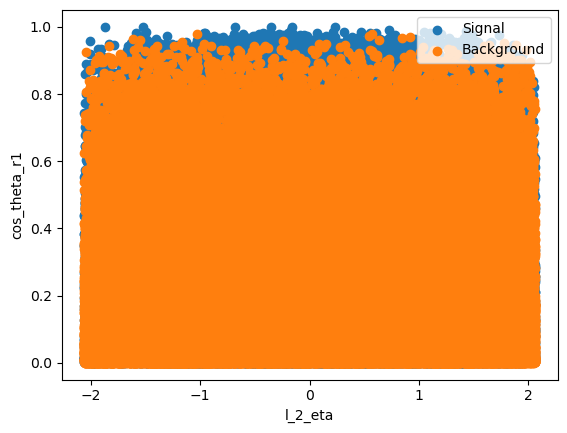

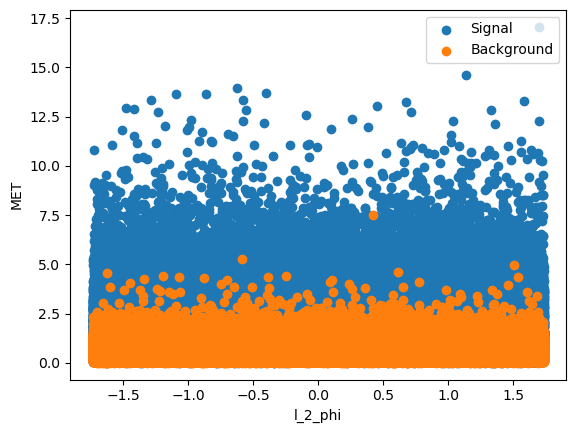

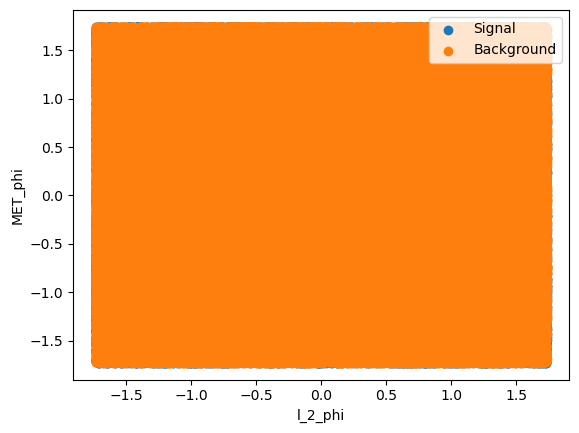

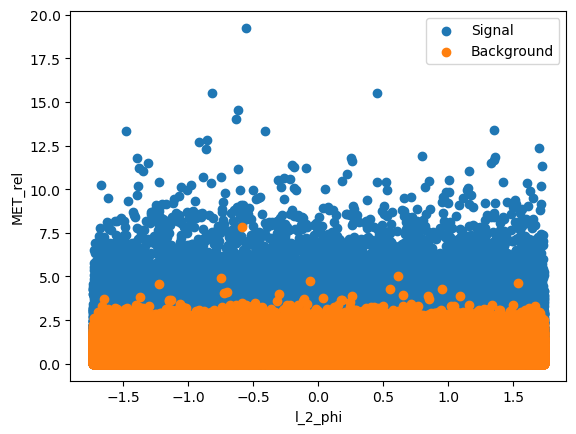

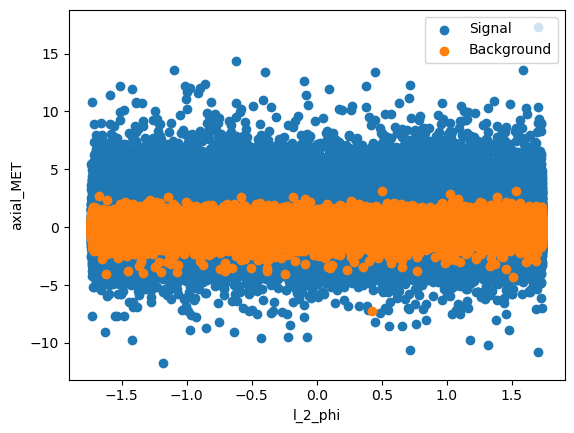

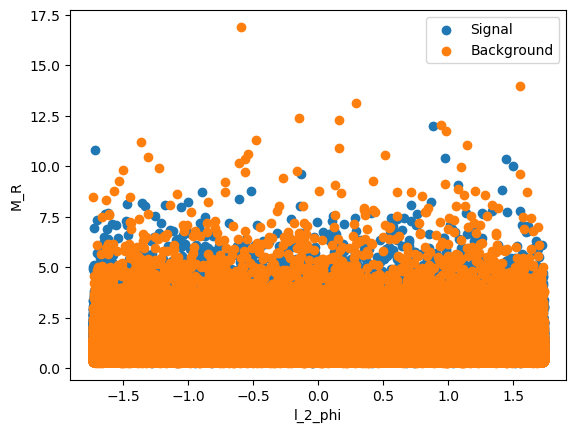

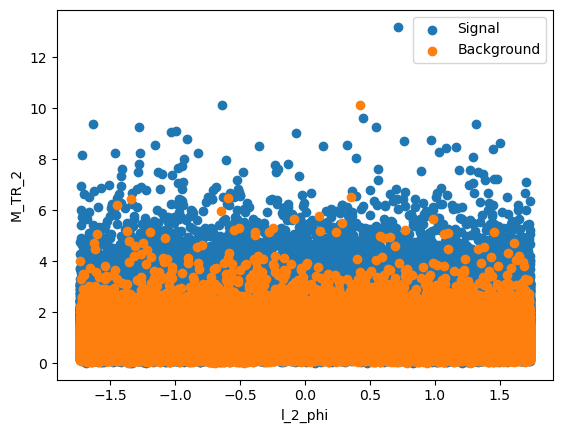

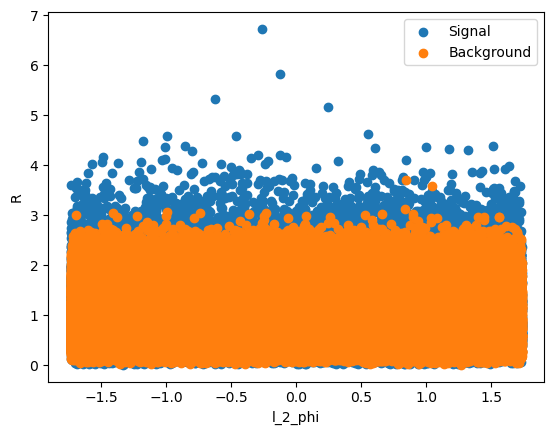

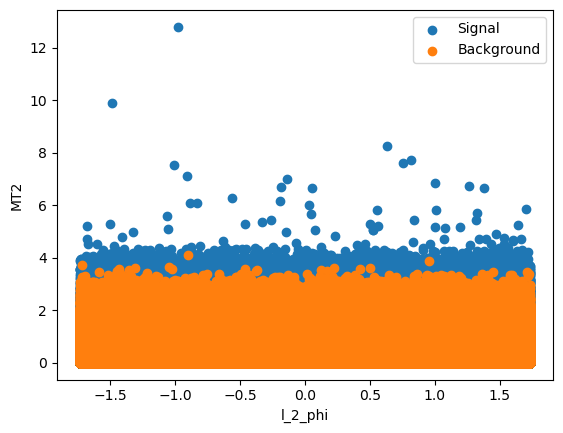

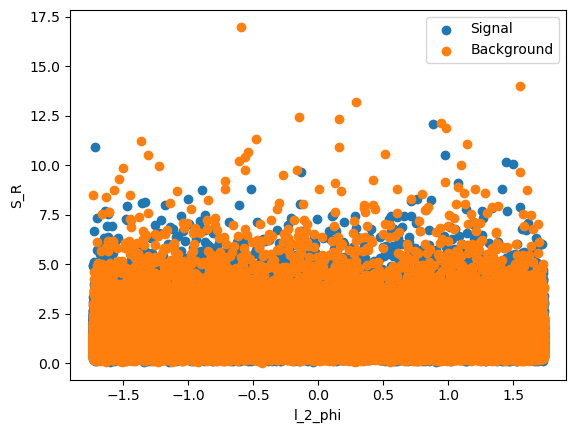

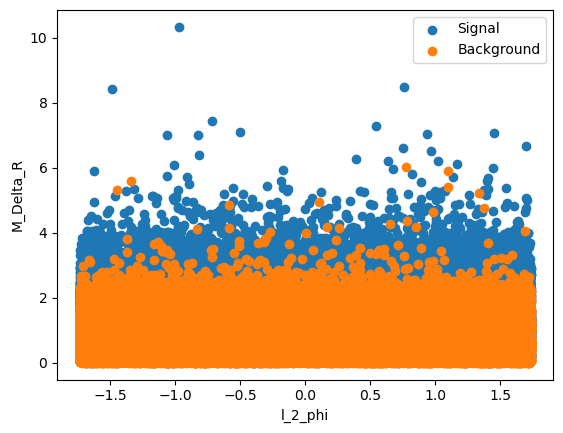

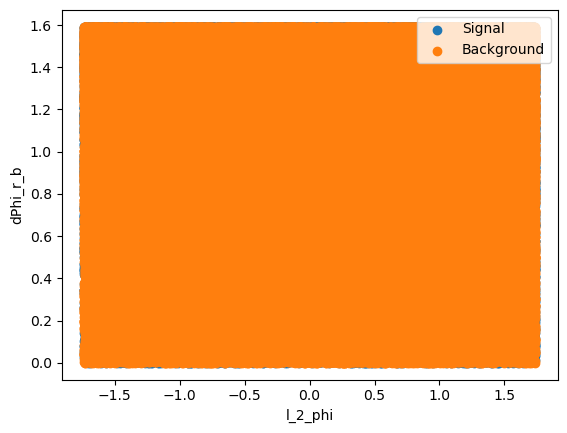

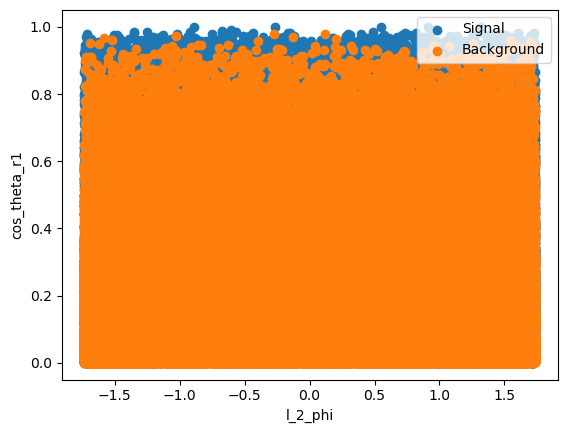

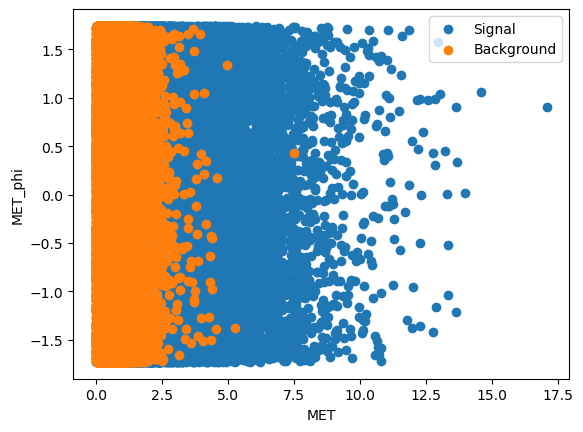

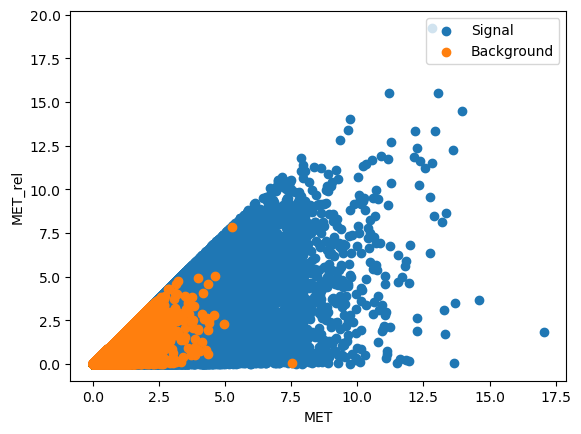

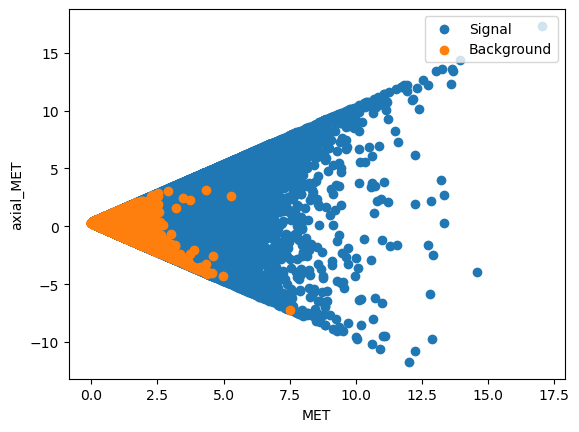

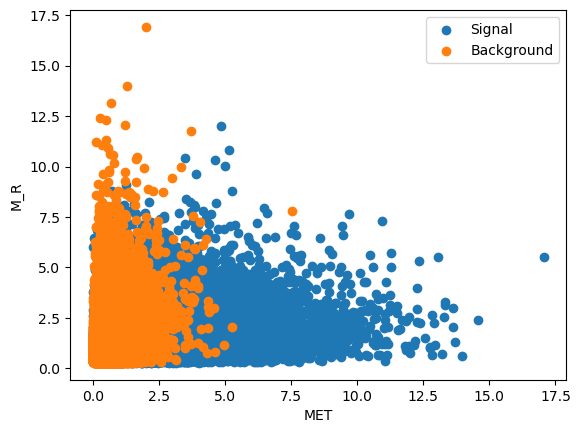

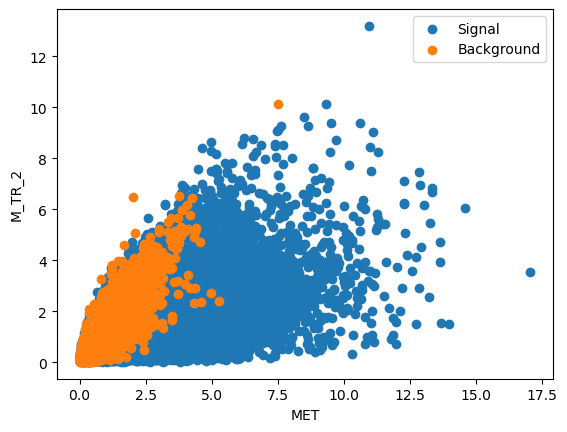

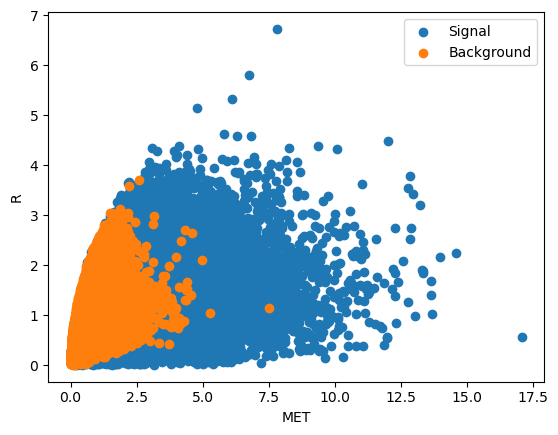

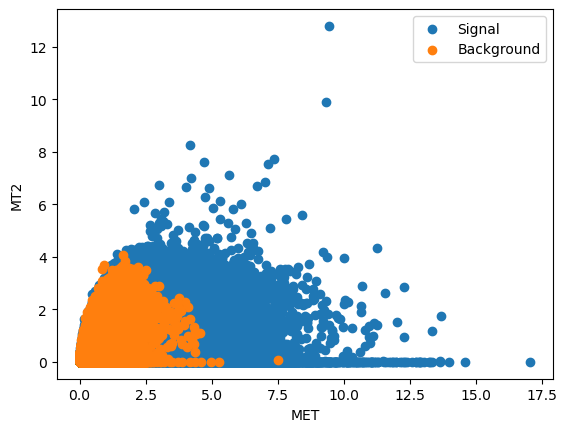

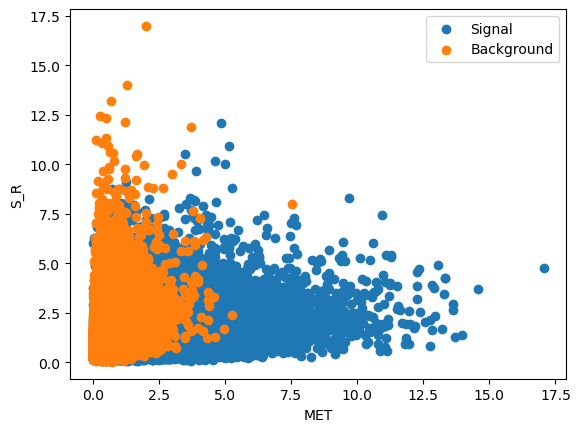

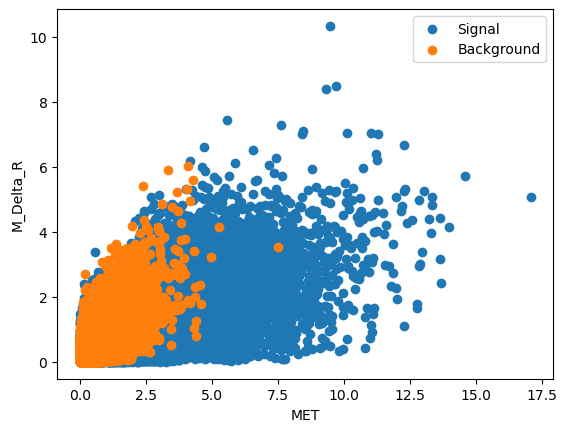

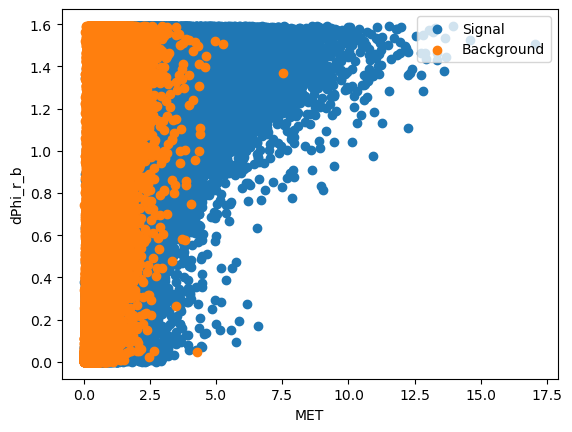

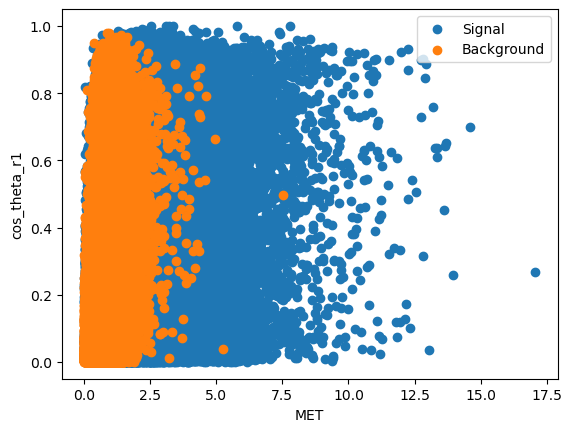

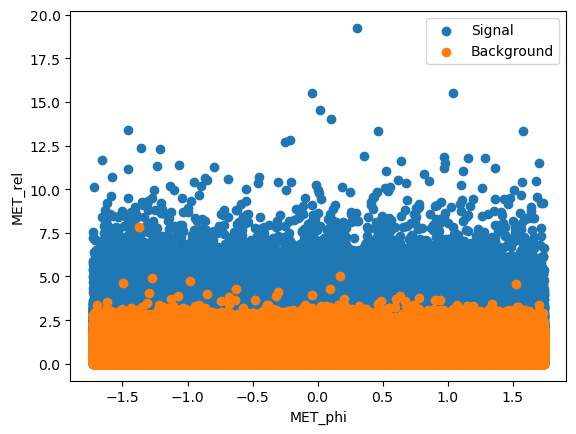

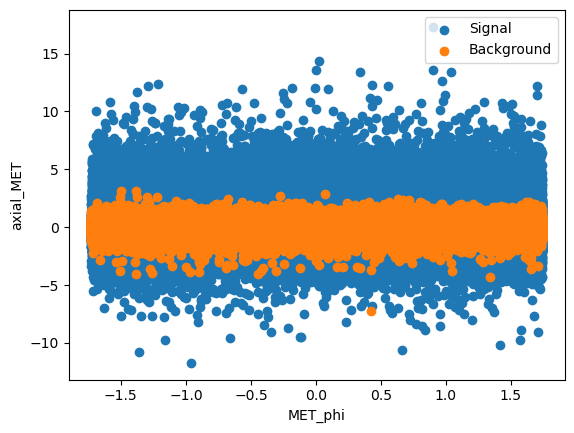

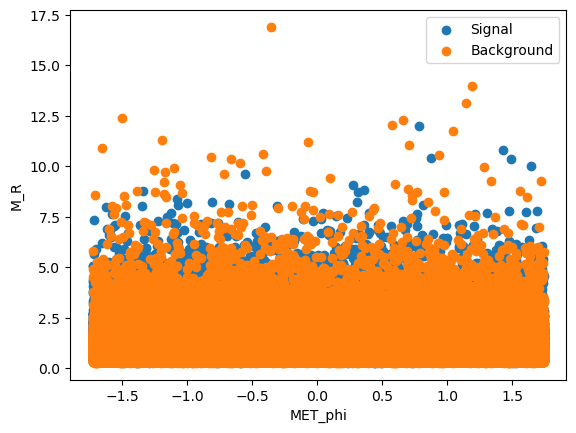

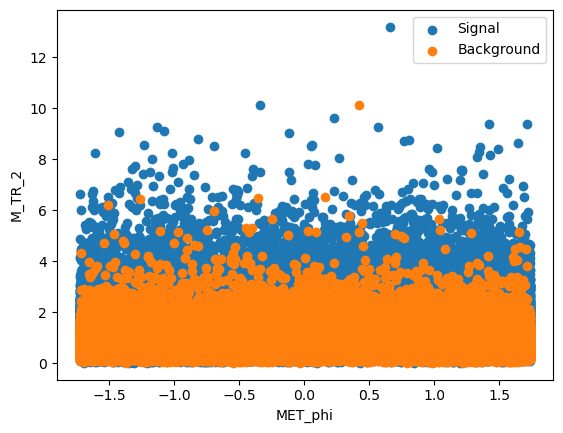

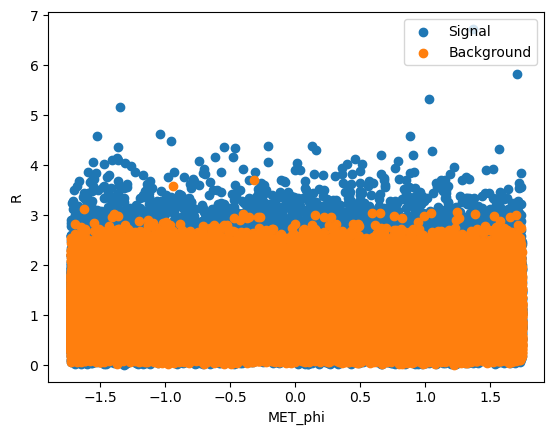

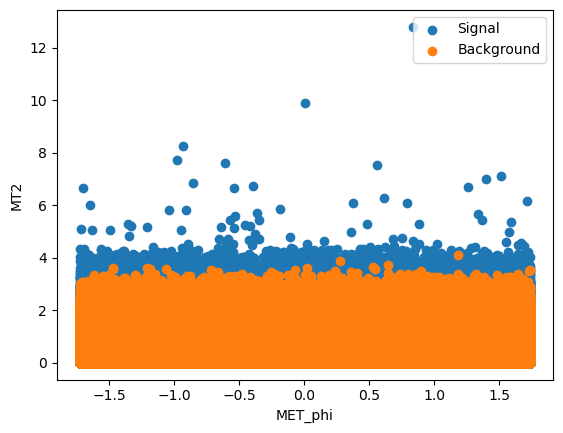

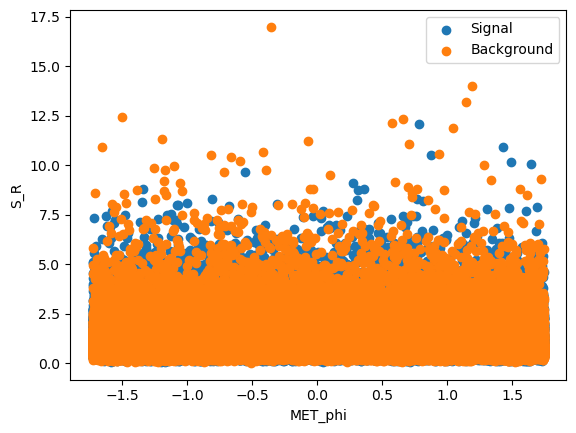

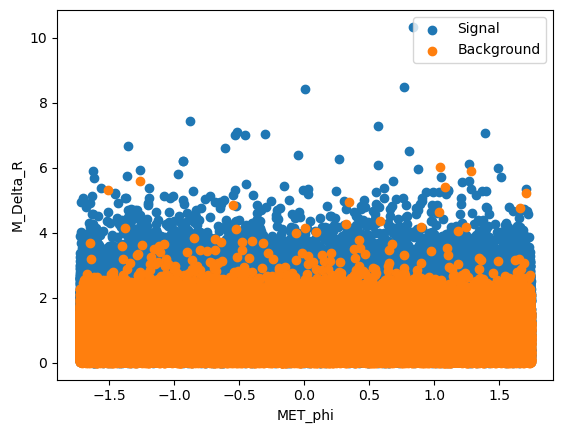

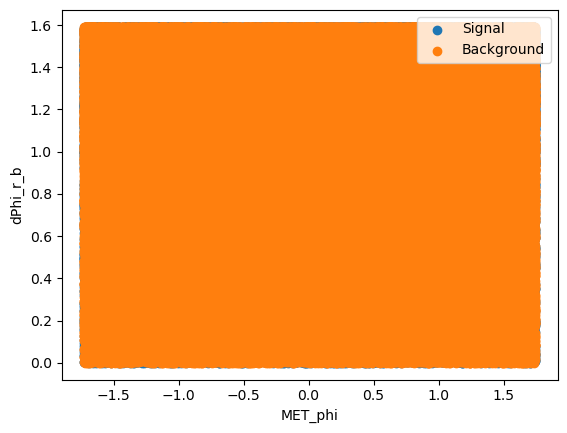

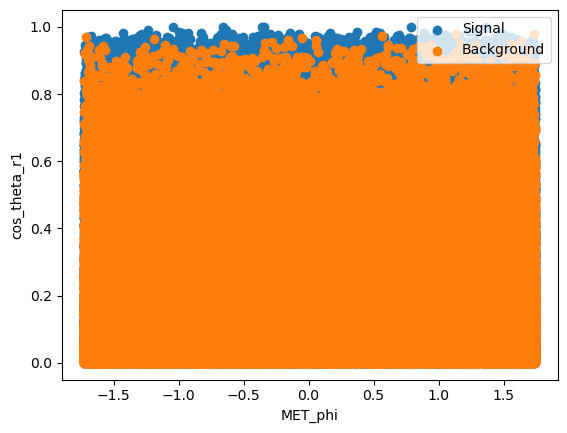

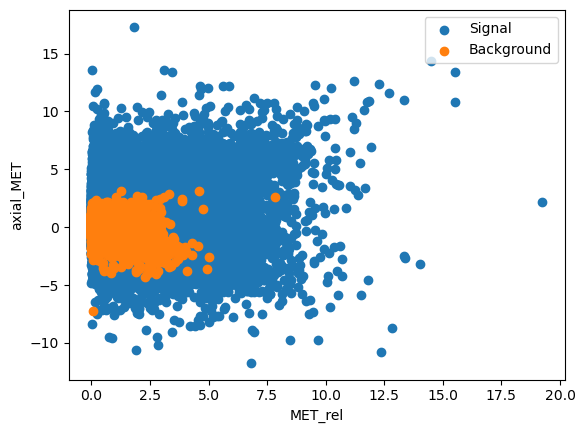

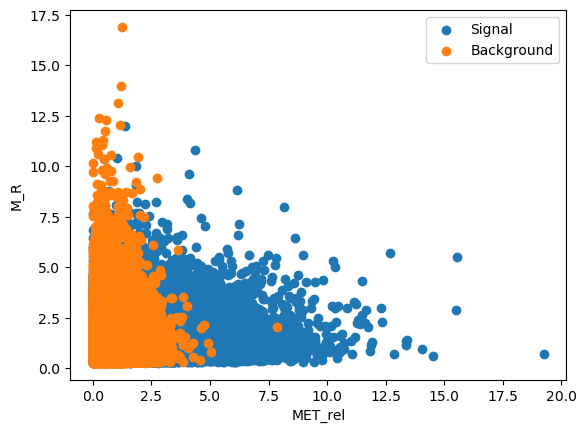

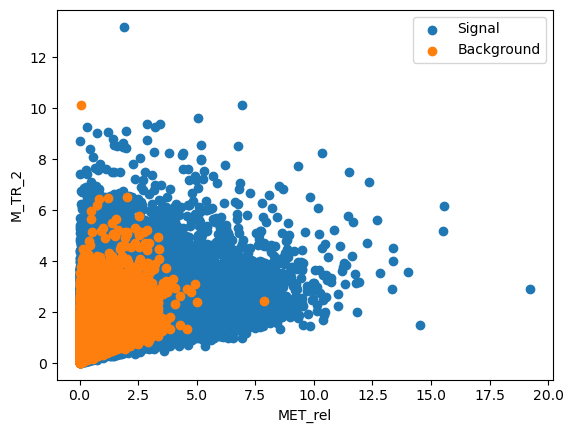

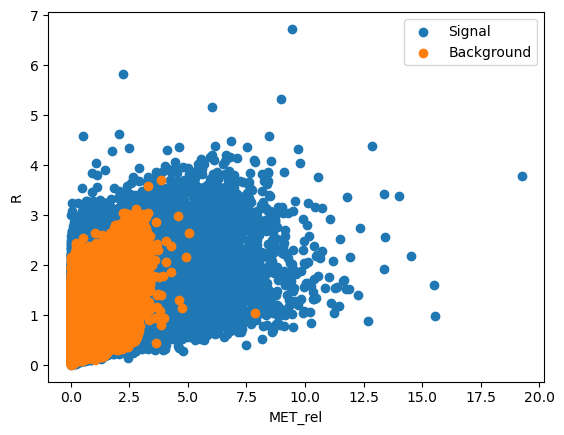

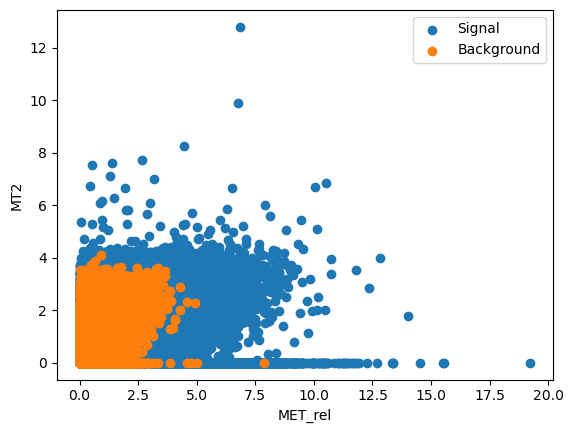

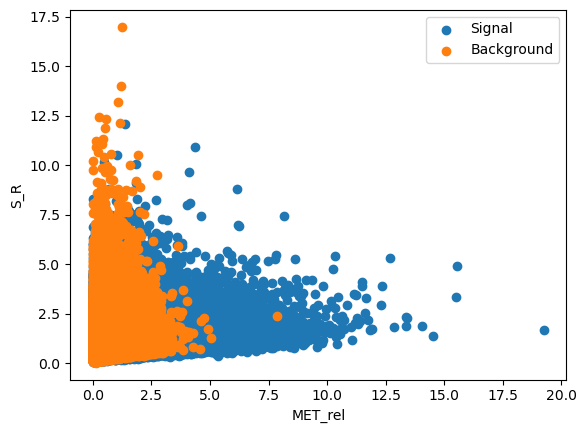

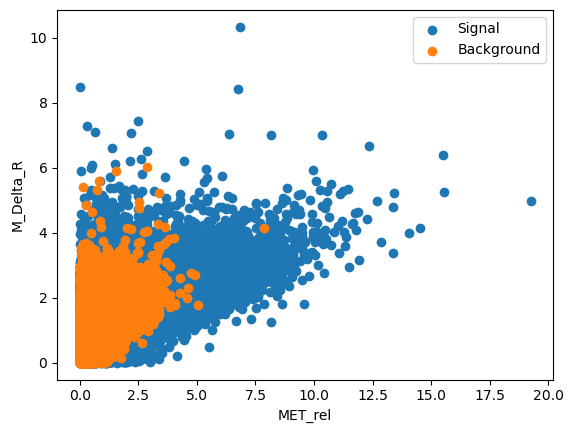

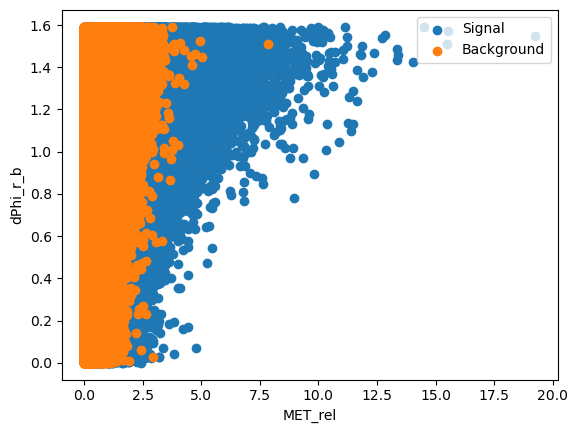

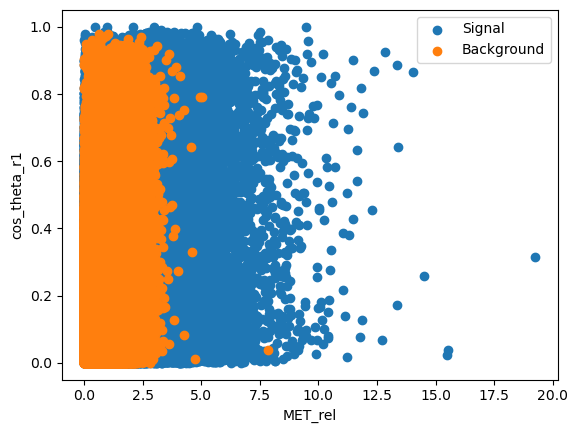

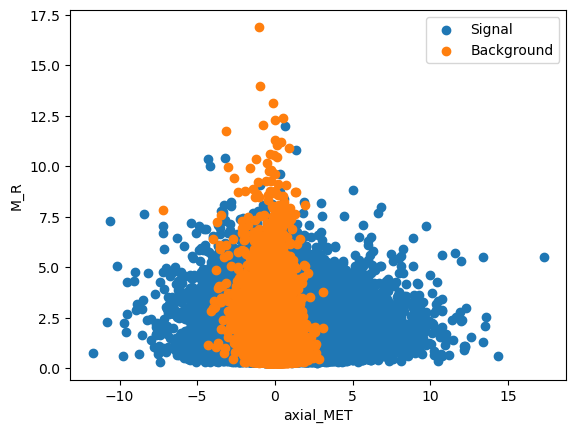

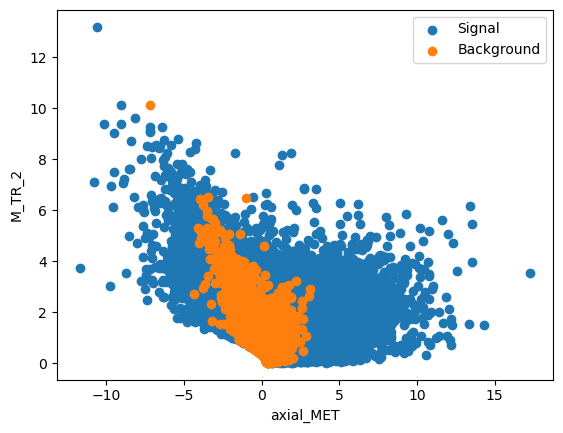

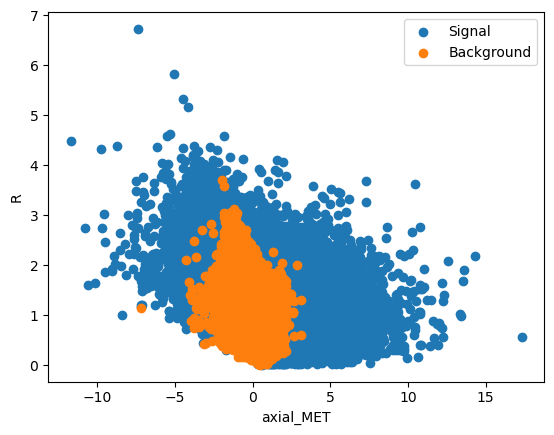

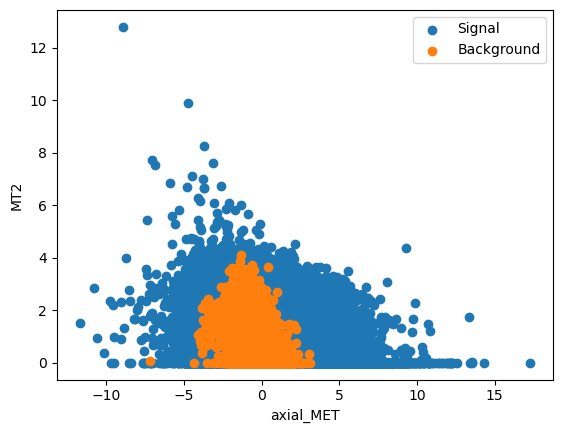

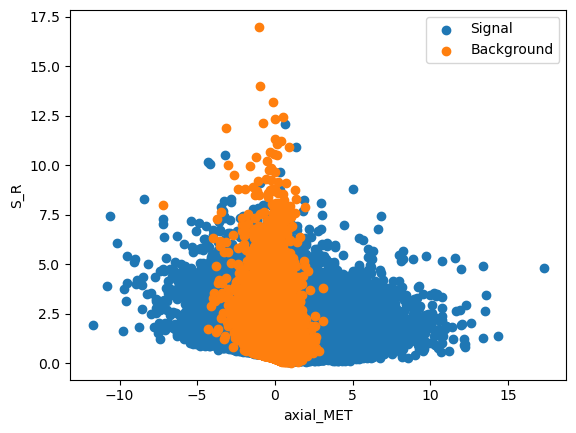

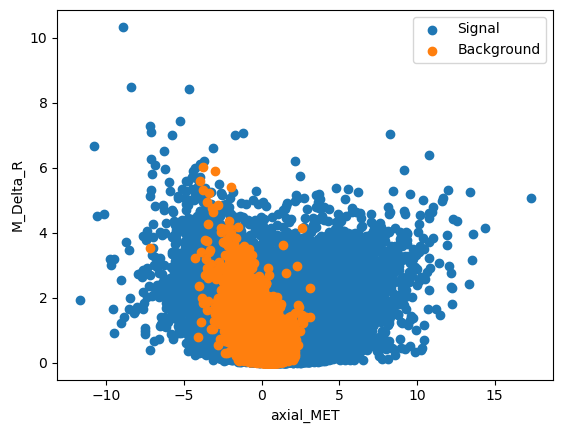

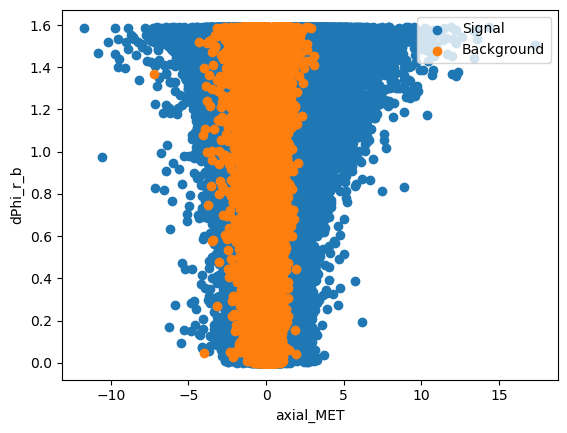

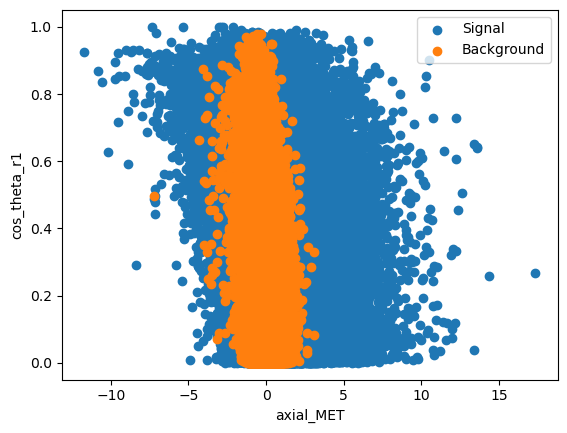

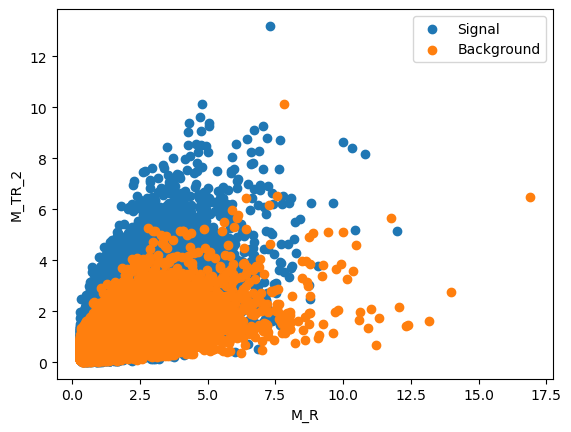

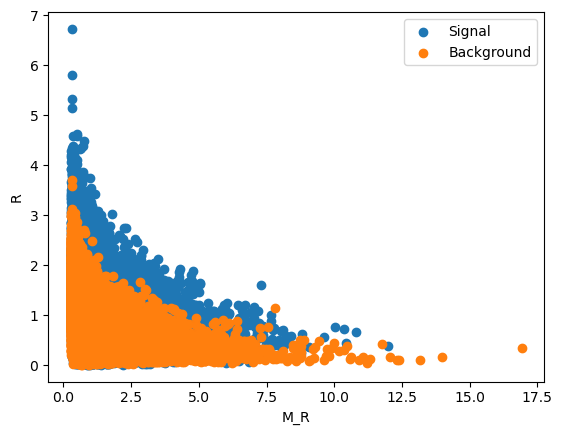

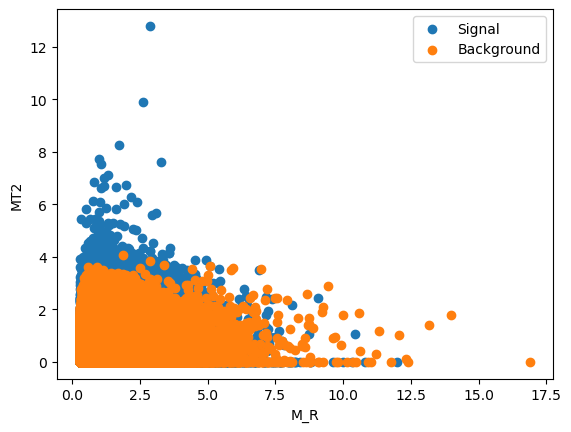

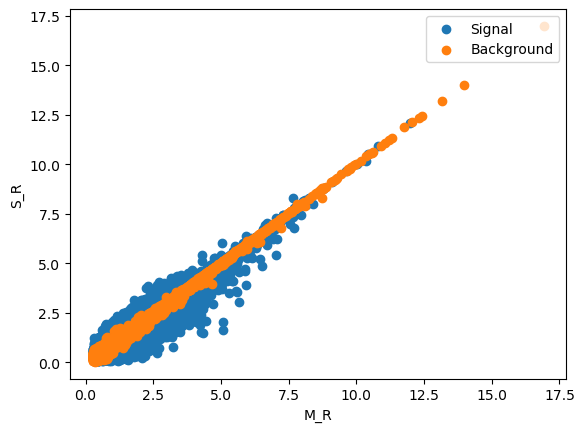

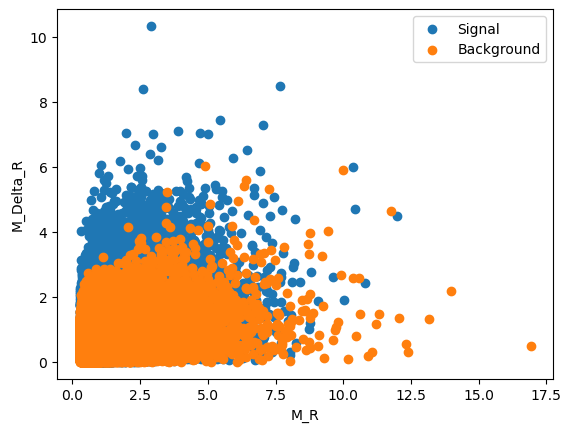

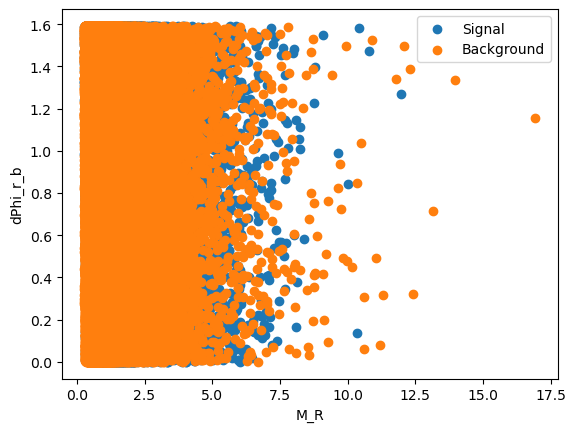

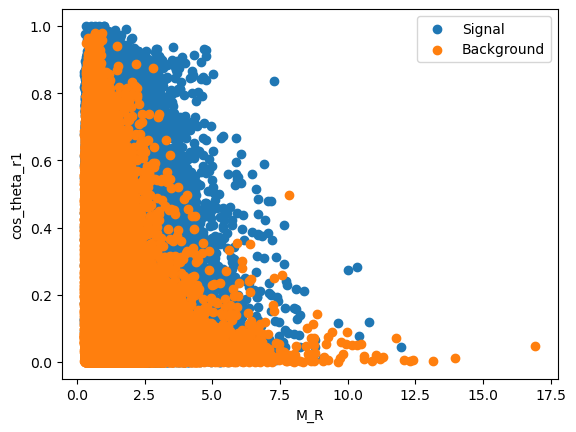

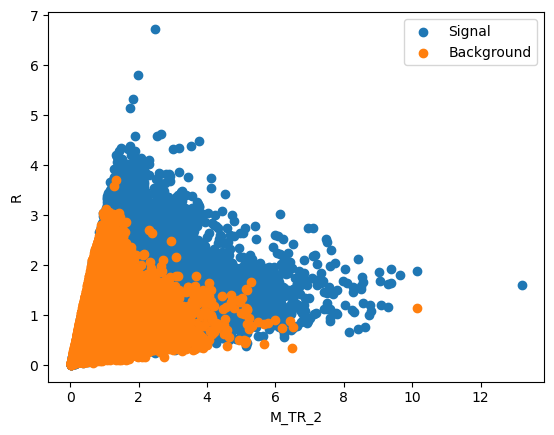

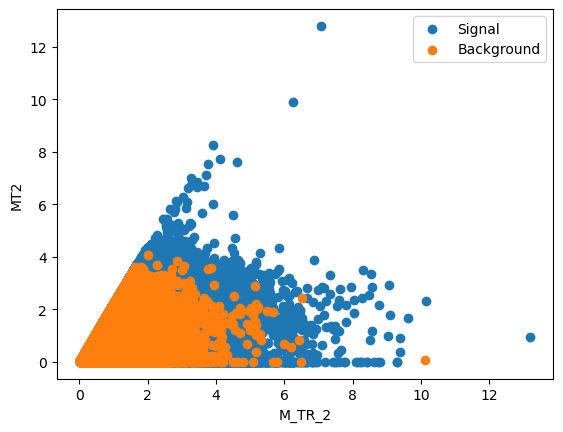

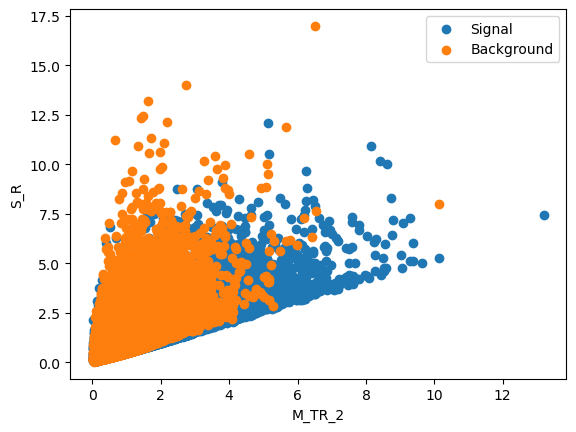

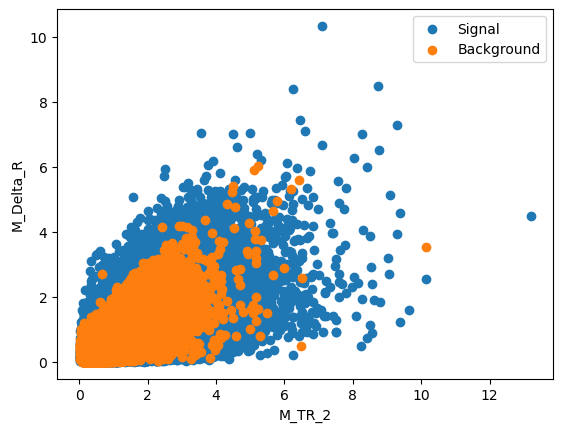

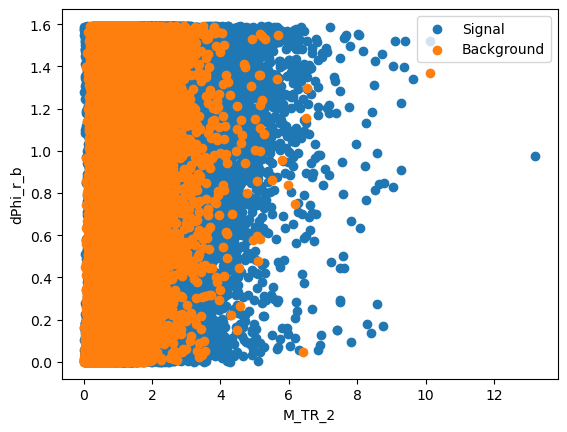

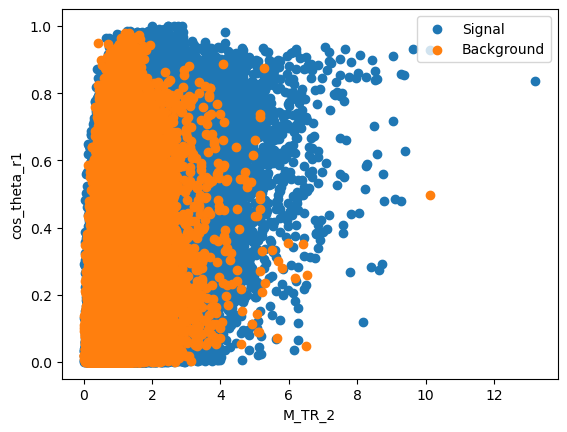

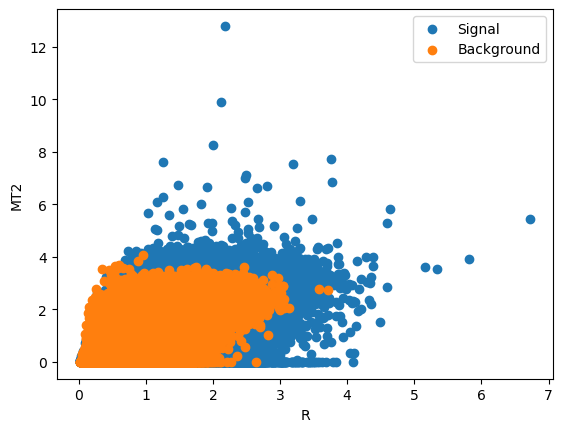

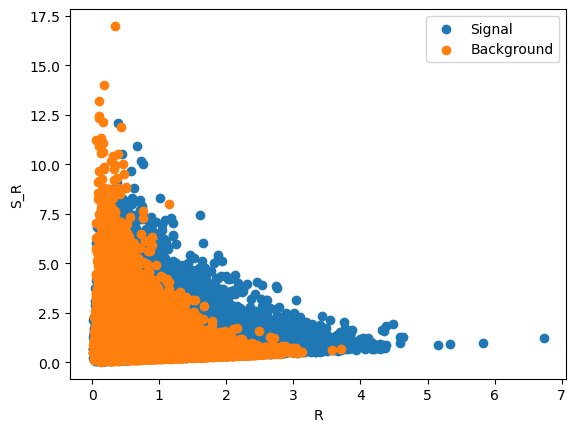

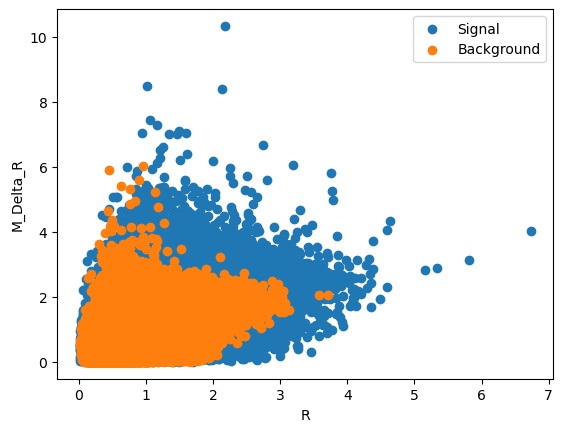

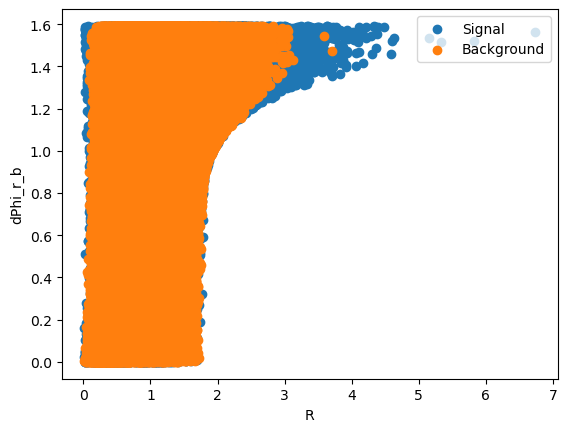

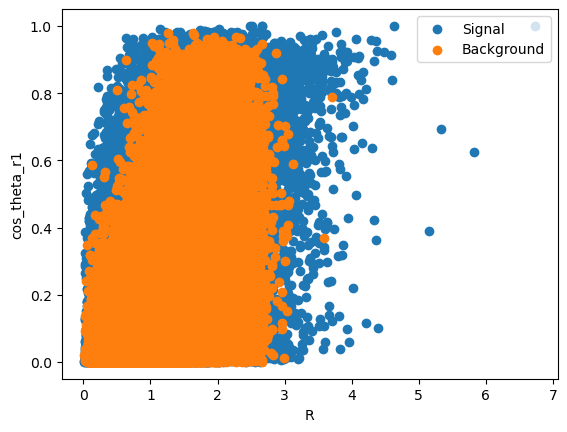

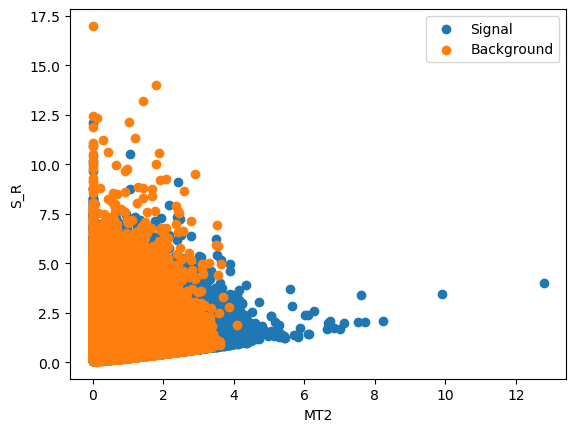

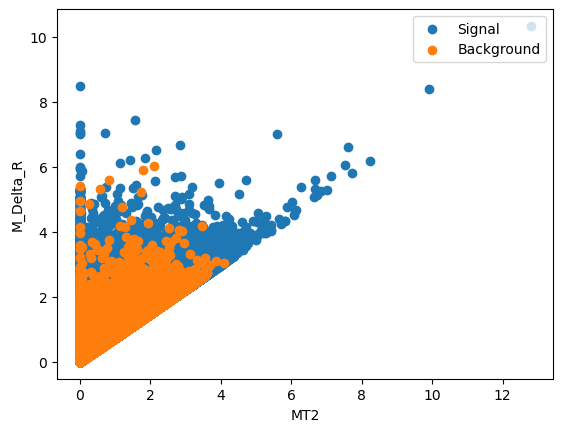

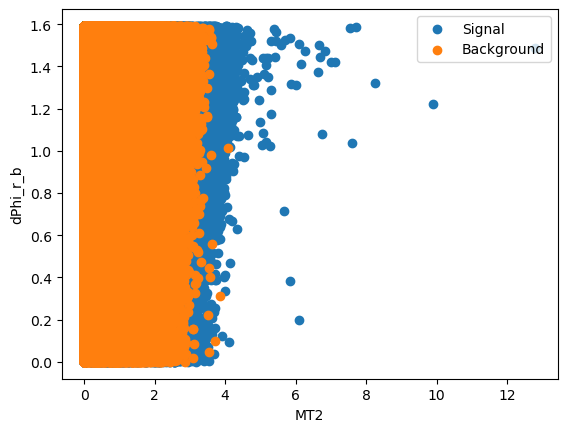

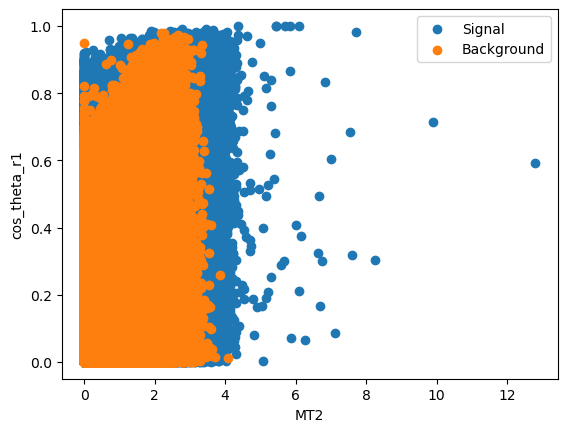

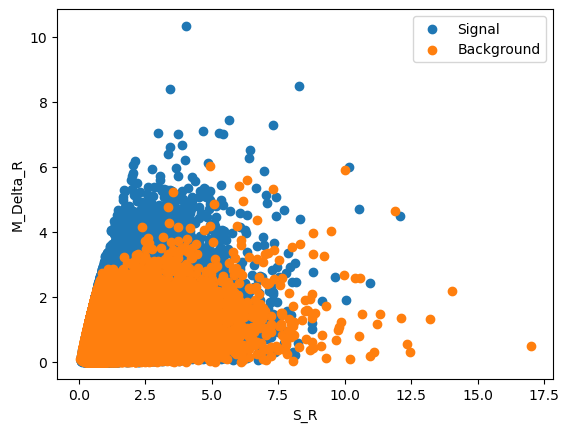

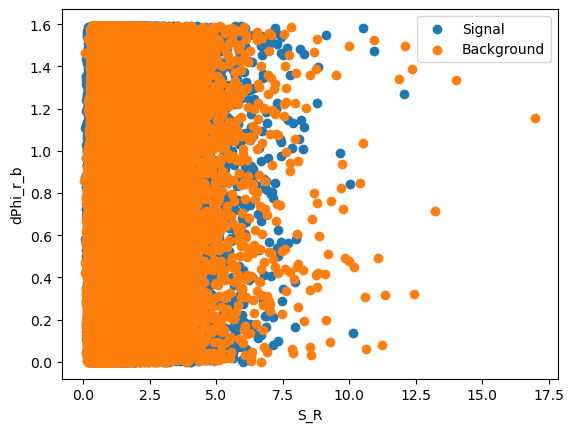

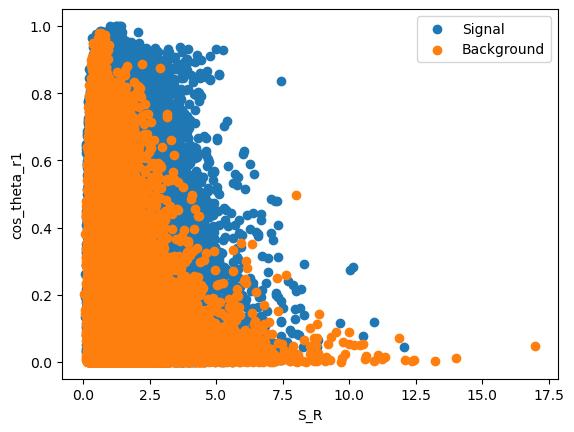

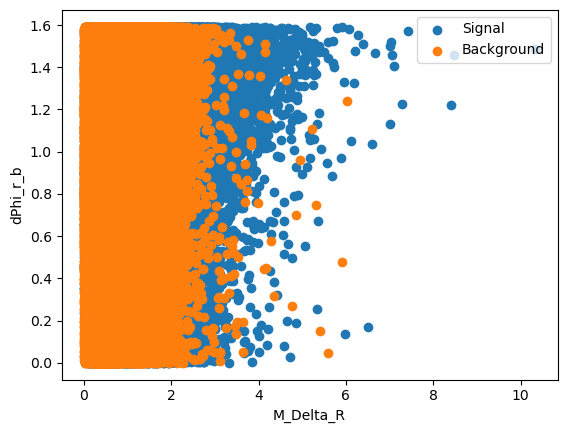

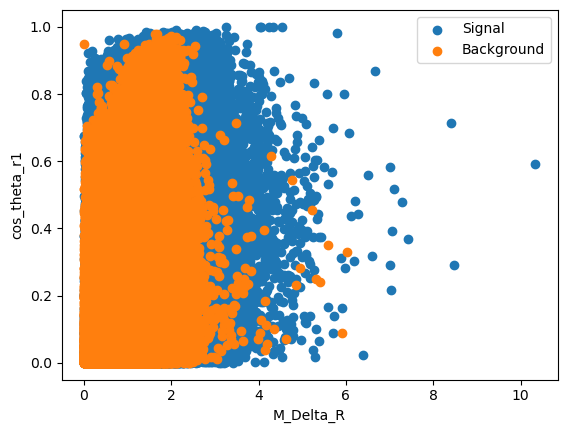

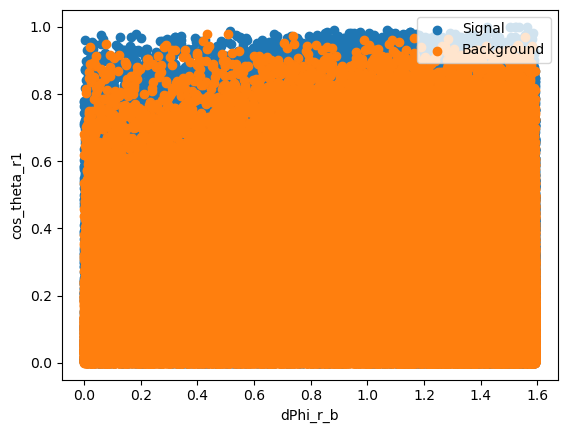

In [101]:
import itertools
import matplotlib.pyplot as plt

for x_var_name, y_var_name in itertools.combinations(df.columns, 2):
    pair_plot(df, x_var_name, y_var_name, selection_dict)
    plt.show()

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [102]:
import numpy as np
from tabulate import tabulate

def compute_stats(data):
    """Compute covariance and correlation matrices."""
    cov_matrix = np.cov(data, rowvar=False)
    corr_matrix = np.corrcoef(data, rowvar=False)
    return cov_matrix, corr_matrix

def display_matrix(matrix, columns, title):
    """Display formatted matrix as a table with tabulate."""
    matrix_df = pd.DataFrame(matrix, columns=columns, index=columns)
    table = tabulate(matrix_df, headers="keys", tablefmt="pretty", floatfmt=".3f")
    print(f"\n{title}:\n{table}\n")

def compute_and_display_stats(data, columns, feature_type=None):
    """Compute and display covariance and correlation matrices with tabulate."""
    if feature_type:
        print(f"\n--- Analyzing {feature_type} Features ---")
    
    cov_matrix, corr_matrix = compute_stats(data)

    display_matrix(cov_matrix, columns, "Covariance Matrix")
    
    display_matrix(corr_matrix, columns, "Correlation Matrix")


low_level_features = df[RawNames]
high_level_features = df[FeatureNames]

In [103]:
compute_and_display_stats(df.values, df.columns, feature_type="All")

compute_and_display_stats(low_level_features.values, low_level_features.columns, feature_type="Low-Level")

compute_and_display_stats(high_level_features.values, high_level_features.columns, feature_type="High-Level")


--- Analyzing All Features ---

Covariance Matrix:
+--------------+------------------------+-------------------------+------------------------+------------------------+------------------------+-------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-----------------------+------------------------+-------------------------+------------------------+
|              |         signal         |         l_1_pT          |        l_1_eta         |        l_1_phi         |         l_2_pT         |         l_2_eta         |        l_2_phi         |          MET           |        MET_phi         |        MET_rel         |       axial_MET        |          M_R           |         M_TR_2         |           R            |          MT2           |          S_R          |       M_Delta_R        |        dPhi

Hint: Example code for embedding a `tabulate` table into a notebook:

In [91]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [145]:
####### 5.1 ########
# Signals have higher values than Background. X > Xc i optimal I think


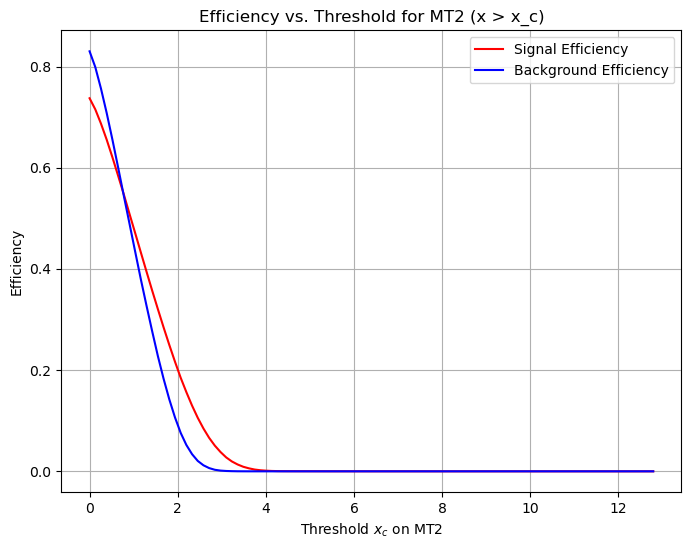

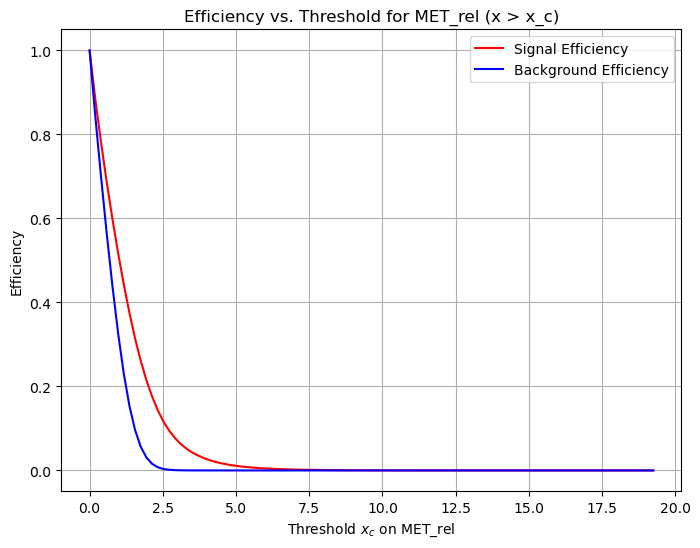

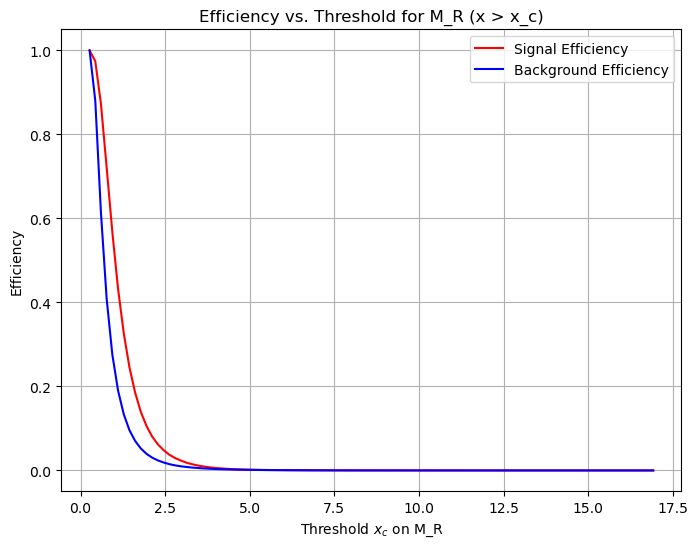

In [147]:
######## 5.2 ###########
def compute_efficiencies(variable, thresholds, direction="greater"):
    eff_signal = []
    eff_bkg = []
    sig_data = df_sig[variable].values
    bkg_data = df_bkg[variable].values
    for tc in thresholds:
        if direction=="greater":
            eff_signal.append(np.sum(sig_data > tc) / len(sig_data))
            eff_bkg.append(np.sum(bkg_data > tc) / len(bkg_data))
        else:
            eff_signal.append(np.sum(sig_data < tc) / len(sig_data))
            eff_bkg.append(np.sum(bkg_data < tc) / len(bkg_data))
    return np.array(eff_signal), np.array(eff_bkg)

def plot_efficiencies(variable, direction="greater", nbins=100):
    x_min = min(df[variable].min(), df_bkg[variable].min())
    x_max = max(df[variable].max(), df_bkg[variable].max())
    thresholds = np.linspace(x_min, x_max, nbins)
    
    eff_sig, eff_bkg = compute_efficiencies(variable, thresholds, direction)
    
    plt.figure(figsize=(8,6))
    plt.plot(thresholds, eff_sig, label="Signal Efficiency", color='red')
    plt.plot(thresholds, eff_bkg, label="Background Efficiency", color='blue')
    plt.xlabel(f"Threshold $x_c$ on {variable}")
    plt.ylabel("Efficiency")
    plt.title(f"Efficiency vs. Threshold for {variable} ({'x > x_c' if direction=='greater' else 'x < x_c'})")
    plt.legend()
    plt.grid(True)
    plt.show()
    return thresholds, eff_sig, eff_bkg

for var in ["MT2", "MET_rel", "M_R"]:
    plot_efficiencies(var, direction="greater")

/var/folders/my/knrt5ls91l70pg_qcyv_xh380000gn/T/ipykernel_50498/2776502340.py:5: RuntimeWarning: invalid value encountered in divide
  significance = np.where((Np_sig + Np_bkg) > 0, Np_sig / np.sqrt(Np_sig + Np_bkg), 0)


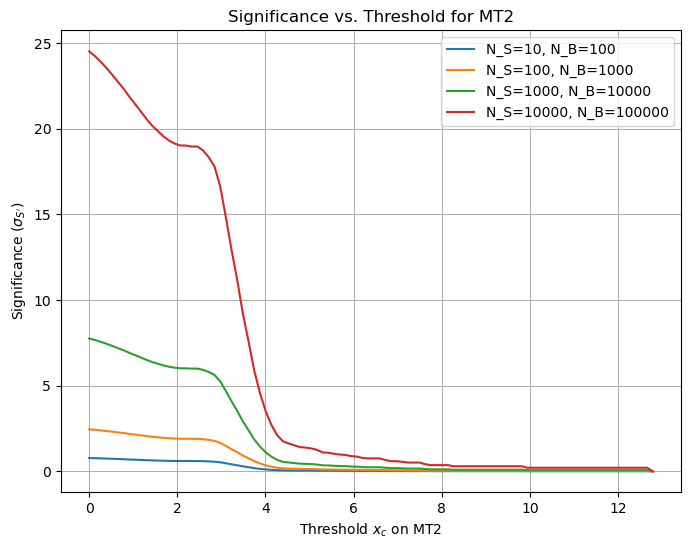

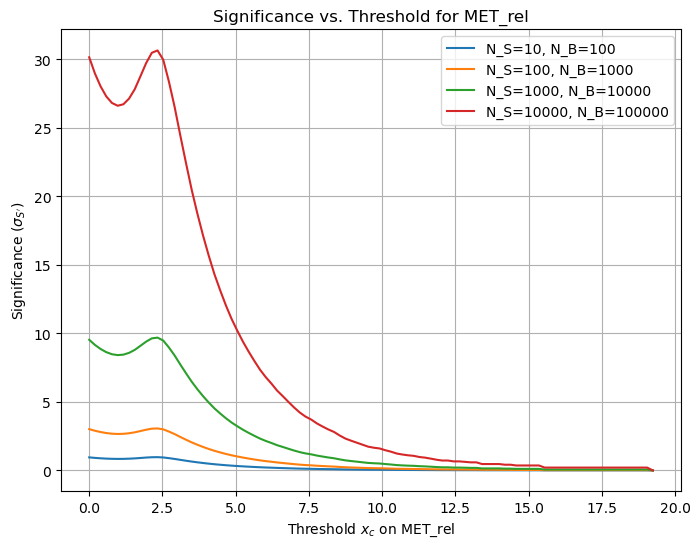

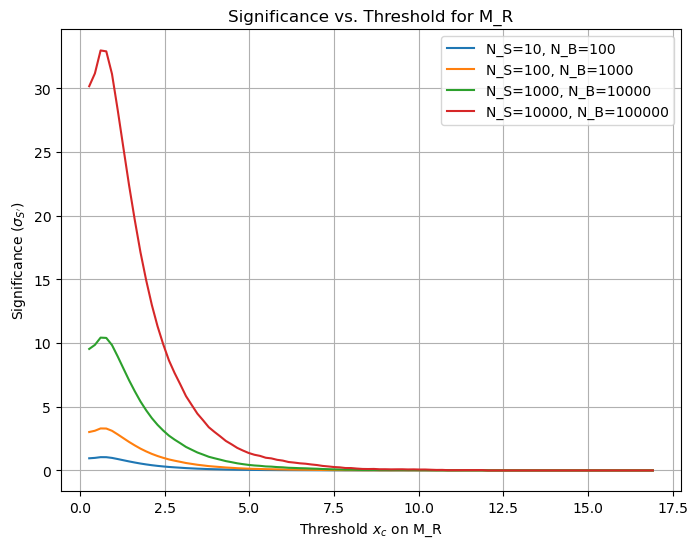

In [149]:
####### 5.3 #########
def compute_significance(eff_sig, eff_bkg, N_sig, N_bkg):
    Np_sig = eff_sig * N_sig
    Np_bkg = eff_bkg * N_bkg
    significance = np.where((Np_sig + Np_bkg) > 0, Np_sig / np.sqrt(Np_sig + Np_bkg), 0)
    return significance

def plot_significance(variable, direction="greater", nbins=100):
    x_min = min(df[variable].min(), df_bkg[variable].min())
    x_max = max(df[variable].max(), df_bkg[variable].max())
    thresholds = np.linspace(x_min, x_max, nbins)
    
    eff_sig, eff_bkg = compute_efficiencies(variable, thresholds, direction)
    
    scenarios = [
        (10, 100),
        (100, 1000),
        (1000, 10000),
        (10000, 100000)
    ]
    
    plt.figure(figsize=(8,6))
    for N_sig, N_bkg in scenarios:
        signif = compute_significance(eff_sig, eff_bkg, N_sig, N_bkg)
        plt.plot(thresholds, signif, label=f"N_S={N_sig}, N_B={N_bkg}")
    plt.xlabel(f"Threshold $x_c$ on {variable}")
    plt.ylabel("Significance ($\\sigma_{S'}$)")
    plt.title(f"Significance vs. Threshold for {variable}")
    plt.legend()
    plt.grid(True)
    plt.show()
    return thresholds, eff_sig, eff_bkg

for var in ["MT2", "MET_rel", "M_R"]:
    plot_significance(var, direction="greater")

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [ ]:
####### 6.1 ###########
## Choosing MT2[Xc=1], MET_rel[Xc=0.8], M_R[Xc=1]

In [151]:
########  6.2 ############
def cut_MT2(df, threshold=1.0):
    return df["MT2"] > threshold

def cut_METrel(df, threshold=0.8):
    return df["MET_rel"] > threshold

def cut_MR(df, threshold=1.0):
    return df["M_R"] > threshold

def compute_cutflow(df_sig, df_bkg, cuts, N_sig, N_bkg):
    flow = []
    prev_sig = np.ones(len(df_sig), dtype=bool)
    prev_bkg = np.ones(len(df_bkg), dtype=bool)
    
    cumulative_sig = prev_sig.copy()
    cumulative_bkg = prev_bkg.copy()
    
    for cut_name, cut_func, threshold in cuts:
        current_sig = cut_func(df_sig, threshold) if 'MT2' in cut_name or 'MET_rel' in cut_name or 'M_R' in cut_name else cut_func(df_sig)
        current_bkg = cut_func(df_bkg, threshold) if 'MT2' in cut_name or 'MET_rel' in cut_name or 'M_R' in cut_name else cut_func(df_bkg)
        cumulative_sig = cumulative_sig & current_sig
        cumulative_bkg = cumulative_bkg & current_bkg
        eps_sig = cumulative_sig.sum() / len(df_sig)
        eps_bkg = cumulative_bkg.sum() / len(df_bkg)
        Np_sig = eps_sig * N_sig
        Np_bkg = eps_bkg * N_bkg
        sig_val = Np_sig / np.sqrt(Np_sig + Np_bkg) if (Np_sig+Np_bkg)>0 else 0
        flow.append({
            "Cut": cut_name,
            "Threshold": threshold,
            "Signal Efficiency": eps_sig,
            "Background Efficiency": eps_bkg,
            "N'_S": Np_sig,
            "N'_B": Np_bkg,
            "Significance": sig_val
        })
    return pd.DataFrame(flow)

cuts = [
    ("MT2", cut_MT2, 1.0),
    ("MET_rel", cut_METrel, 0.8),
    ("M_R", cut_MR, 1.0)
]

cutflow_df = compute_cutflow(df_sig, df_bkg, cuts, 1000, 10000)
print("Cut-Flow Table for N_S=1000, N_B=10000")
print(cutflow_df.to_string(index=False))

Cut-Flow Table for N_S=1000, N_B=10000
    Cut  Threshold  Signal Efficiency  Background Efficiency       N'_S        N'_B  Significance
    MT2        1.0           0.480617               0.449325 480.616807 4493.250355      6.814780
MET_rel        0.8           0.402281               0.349611 402.281402 3496.112722      6.442984
    M_R        1.0           0.186647               0.070484 186.647473  704.843863      6.251202


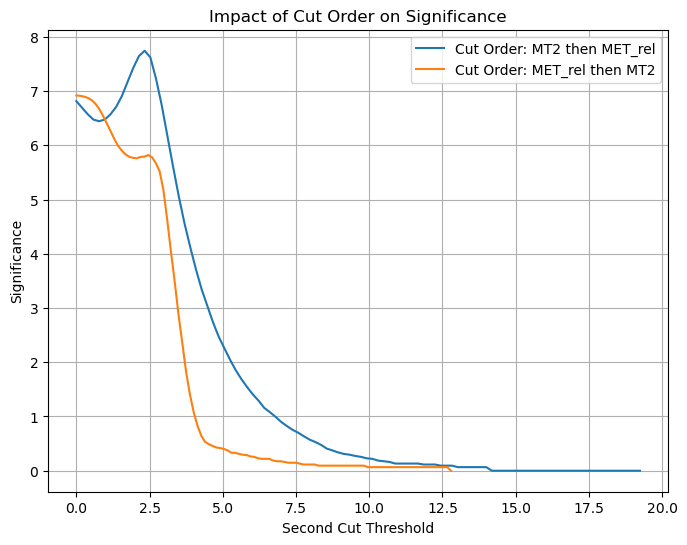

In [153]:
####### 6.3  ##############
def optimize_two_cuts(df_sig, df_bkg, var1, var2, thresh1, thresh2_values, N_sig, N_bkg, direction="greater"):
    if direction=="greater":
        sig_after_var1 = df_sig[df_sig[var1] > thresh1]
        bkg_after_var1 = df_bkg[df_bkg[var1] > thresh1]
    else:
        sig_after_var1 = df_sig[df_sig[var1] < thresh1]
        bkg_after_var1 = df_bkg[df_bkg[var1] < thresh1]
    
    significances = []
    for t2 in thresh2_values:
        if direction=="greater":
            eff_sig = np.sum(sig_after_var1[var2] > t2) / len(df_sig)
            eff_bkg = np.sum(bkg_after_var1[var2] > t2) / len(df_bkg)
        else:
            eff_sig = np.sum(sig_after_var1[var2] < t2) / len(df_sig)
            eff_bkg = np.sum(bkg_after_var1[var2] < t2) / len(df_bkg)
        Np_sig = eff_sig * N_sig
        Np_bkg = eff_bkg * N_bkg
        sig_val = Np_sig / np.sqrt(Np_sig + Np_bkg) if (Np_sig+Np_bkg)>0 else 0
        significances.append(sig_val)
    return significances

thresh_grid = np.linspace(0, df["MET_rel"].max(), 100)

sig_order1 = optimize_two_cuts(df_sig, df_bkg, "MT2", "MET_rel", 1.0, thresh_grid, 1000, 10000, direction="greater")

thresh_grid_MT2 = np.linspace(0, df["MT2"].max(), 100)
sig_order2 = optimize_two_cuts(df_sig, df_bkg, "MET_rel", "MT2", 0.8, thresh_grid_MT2, 1000, 10000, direction="greater")

plt.figure(figsize=(8,6))
plt.plot(thresh_grid, sig_order1, label="Cut Order: MT2 then MET_rel")
plt.plot(thresh_grid_MT2, sig_order2, label="Cut Order: MET_rel then MT2")
plt.xlabel("Second Cut Threshold")
plt.ylabel("Significance")
plt.title("Impact of Cut Order on Significance")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



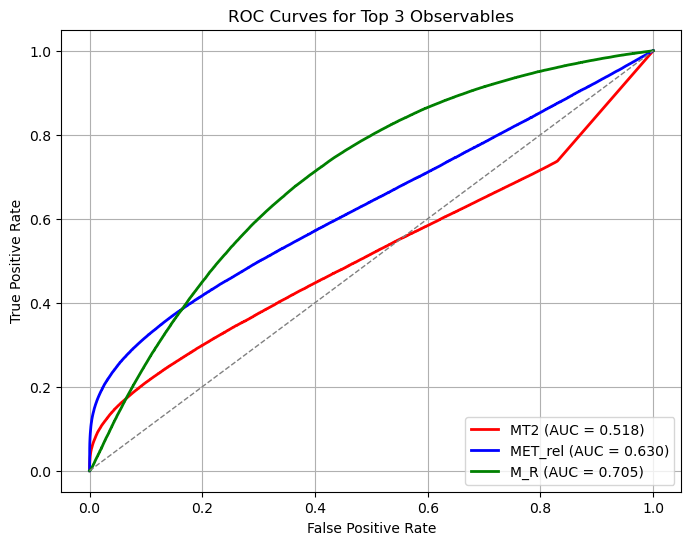

In [159]:
####### 7.1 #######
from sklearn.metrics import roc_curve, auc

def plot_ROC(variable, direction="greater"):
    
    data = np.concatenate([df_sig[variable].values, df_bkg[variable].values])
    labels = np.concatenate([np.ones(len(df_sig)), np.zeros(len(df_bkg))])
    
    fpr, tpr, thresholds = roc_curve(labels, data)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

plt.figure(figsize=(8,6))
observables = ["MT2", "MET_rel", "M_R"]
colors = ['red', 'blue', 'green']
for var, col in zip(observables, colors):
    fpr, tpr, roc_auc = plot_ROC(var, direction="greater")
    plt.plot(fpr, tpr, color=col, lw=2, label=f"{var} (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Top 3 Observables")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

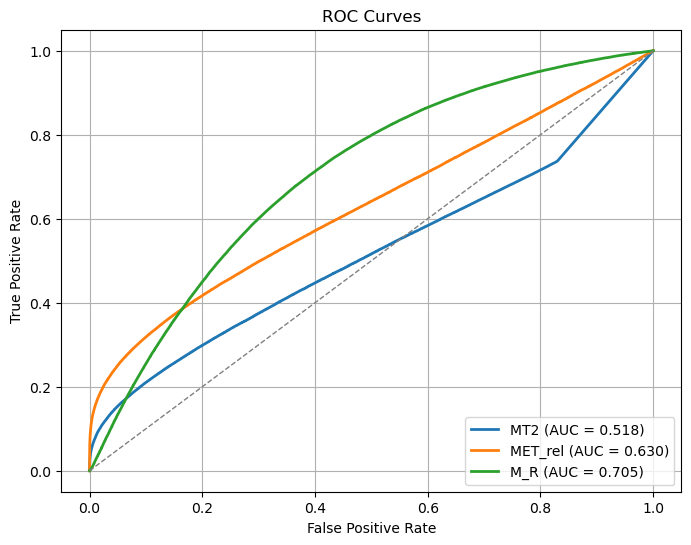

In [157]:
####### 7.2 #######
def plot_multiple_ROC(observables, df_sig, df_bkg):
    from sklearn.metrics import roc_curve, auc
    plt.figure(figsize=(8,6))
    for var in observables:
        data = np.concatenate([df_sig[var].values, df_bkg[var].values])
        labels = np.concatenate([np.ones(len(df_sig)), np.zeros(len(df_bkg))])
        fpr, tpr, _ = roc_curve(labels, data)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{var} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_multiple_ROC(observables, df_sig, df_bkg)

ROC before any cuts:


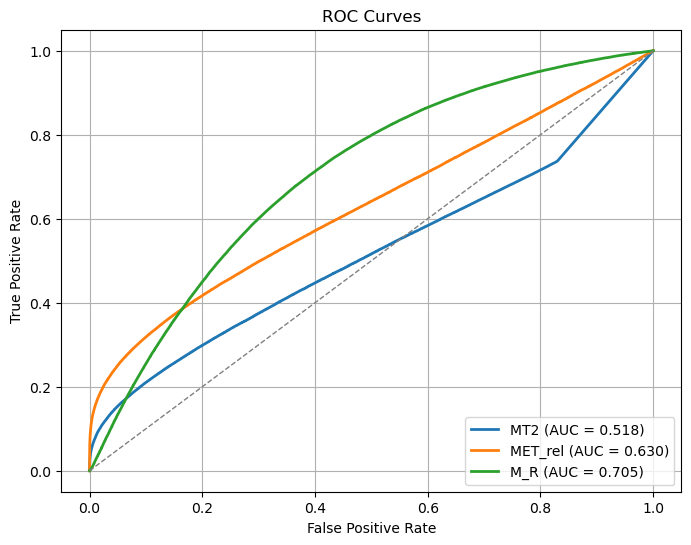

ROC after MT2 > 1.0:


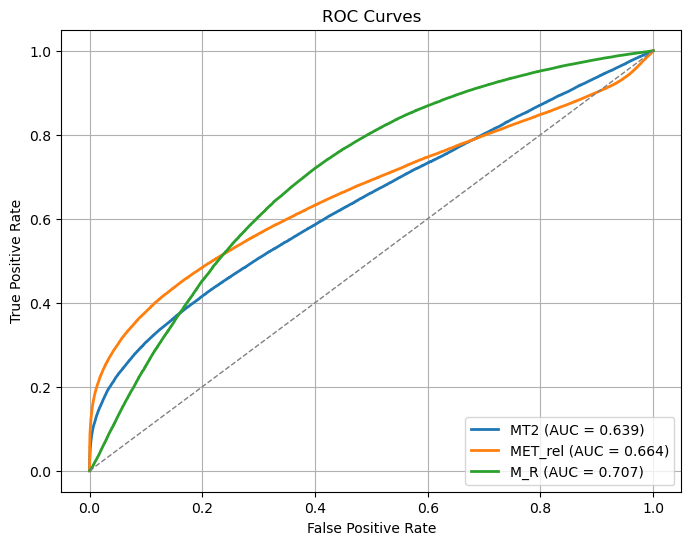

ROC after MET_rel > 0.8:


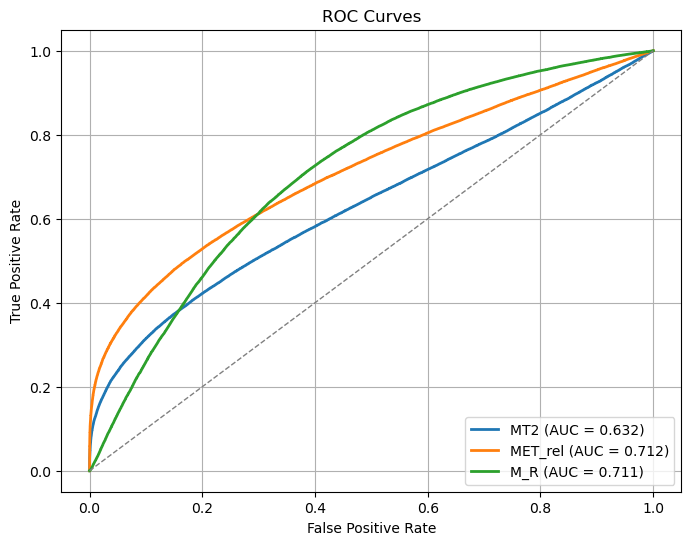

ROC after M_R > 1.0:


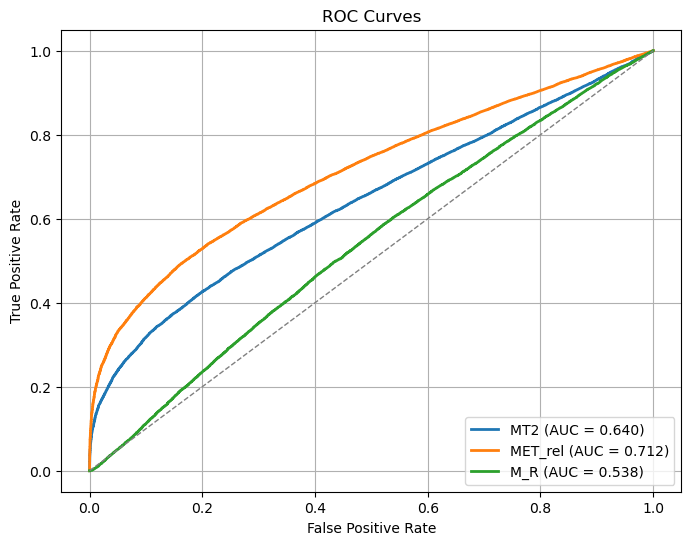

In [161]:
####### 7.3 #######
def apply_cut(df, cut_func, threshold):
    return df[cut_func(df, threshold)]

df_sig_initial = df_sig.copy()
df_bkg_initial = df_bkg.copy()

print("ROC before any cuts:")
plot_multiple_ROC(observables, df_sig_initial, df_bkg_initial)

df_sig_stage1 = df_sig_initial[df_sig_initial["MT2"] > 1.0]
df_bkg_stage1 = df_bkg_initial[df_bkg_initial["MT2"] > 1.0]
print("ROC after MT2 > 1.0:")
plot_multiple_ROC(observables, df_sig_stage1, df_bkg_stage1)

df_sig_stage2 = df_sig_stage1[df_sig_stage1["MET_rel"] > 0.8]
df_bkg_stage2 = df_bkg_stage1[df_bkg_stage1["MET_rel"] > 0.8]
print("ROC after MET_rel > 0.8:")
plot_multiple_ROC(observables, df_sig_stage2, df_bkg_stage2)

df_sig_stage3 = df_sig_stage2[df_sig_stage2["M_R"] > 1.0]
df_bkg_stage3 = df_bkg_stage2[df_bkg_stage2["M_R"] > 1.0]
print("ROC after M_R > 1.0:")
plot_multiple_ROC(observables, df_sig_stage3, df_bkg_stage3)

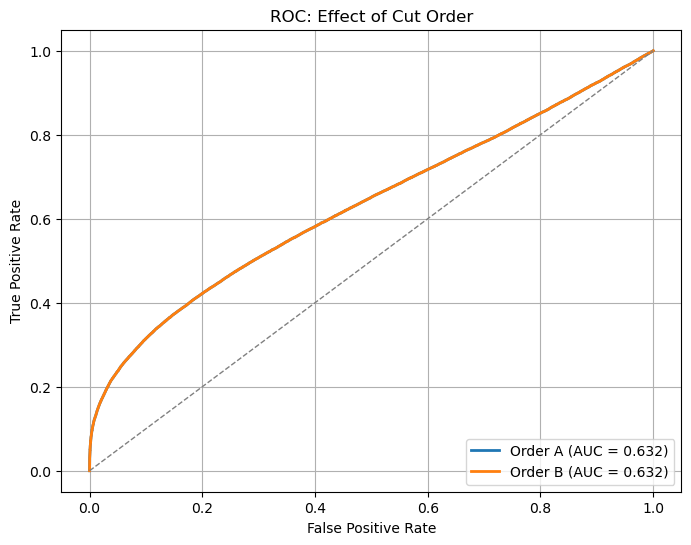

In [163]:
####### 7.4 #######
df_sig_A = df_sig[df_sig["MT2"] > 1.0]
df_sig_A = df_sig_A[df_sig_A["MET_rel"] > 0.8]
df_bkg_A = df_bkg[df_bkg["MT2"] > 1.0]
df_bkg_A = df_bkg_A[df_bkg_A["MET_rel"] > 0.8]

df_sig_B = df_sig[df_sig["MET_rel"] > 0.8]
df_sig_B = df_sig_B[df_sig_B["MT2"] > 1.0]
df_bkg_B = df_bkg[df_bkg["MET_rel"] > 0.8]
df_bkg_B = df_bkg_B[df_bkg_B["MT2"] > 1.0]

plt.figure(figsize=(8,6))
for label, ds, db in zip(["Order A", "Order B"], [df_sig_A, df_sig_B], [df_bkg_A, df_bkg_B]):
    data = np.concatenate([ds["MT2"].values, db["MT2"].values])
    labels = np.concatenate([np.ones(len(ds)), np.zeros(len(db))])
    fpr, tpr, _ = roc_curve(labels, data)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: Effect of Cut Order")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.2

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.3

Draw the ROC curve for $F_n$. 

### Exercise 8.4

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [166]:
######### 8.1 #########
vars_ld = ["MT2", "MET_rel", "M_R"]

m_sig = df_sig[vars_ld].mean().values.reshape(-1,1)
m_bkg = df_bkg[vars_ld].mean().values.reshape(-1,1)

S_B = (m_sig - m_bkg) @ (m_sig - m_bkg).T

def scatter_matrix(df, mean_vec, variables):
    X = df[variables].values
    scatter = np.zeros((len(variables), len(variables)))
    for x in X:
        diff = (x.reshape(-1,1) - mean_vec)
        scatter += diff @ diff.T
    return scatter

S_W_sig = scatter_matrix(df_sig, m_sig, vars_ld)
S_W_bkg = scatter_matrix(df_bkg, m_bkg, vars_ld)
S_W = S_W_sig + S_W_bkg

print("Between-class scatter matrix S_B:")
print(S_B)
print("\nWithin-class scatter matrix S_W:")
print(S_W)

Between-class scatter matrix S_B:
[[0.01890419 0.06946928 0.04671619]
 [0.06946928 0.25528632 0.17167305]
 [0.04671619 0.17167305 0.11544542]]

Within-class scatter matrix S_W:
[[366482.79504882 195765.22673965 -24071.44390028]
 [195765.22673965 363552.91206008    531.00120902]
 [-24071.44390028    531.00120902 181751.93249063]]



Linear coefficients (w):
[-3.45776939e-07  1.57331666e-06  1.81903879e-06]


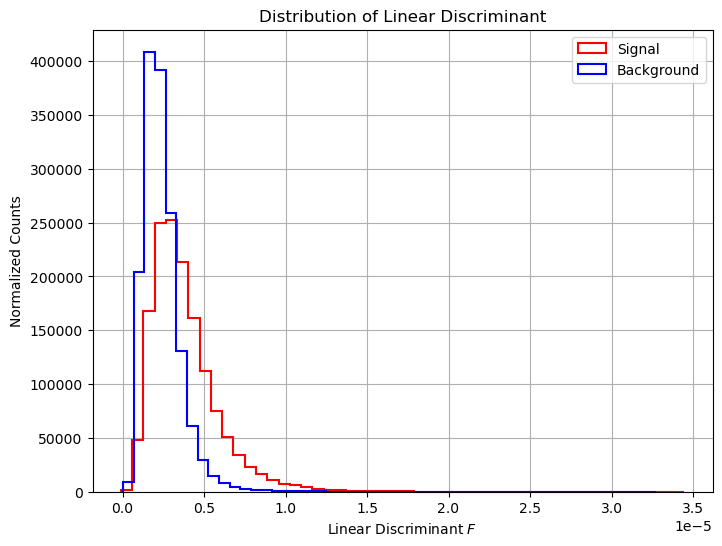

In [168]:
######### 8.2 #########
w = np.linalg.inv(S_W) @ (m_sig - m_bkg)
print("\nLinear coefficients (w):")
print(w.flatten())

F_sig = df_sig[vars_ld].values @ w
F_bkg = df_bkg[vars_ld].values @ w

plt.figure(figsize=(8,6))
plt.hist(F_sig, bins=50, histtype='step', density=True, label='Signal', color='red', linewidth=1.5)
plt.hist(F_bkg, bins=50, histtype='step', density=True, label='Background', color='blue', linewidth=1.5)
plt.xlabel("Linear Discriminant $F$")
plt.ylabel("Normalized Counts")
plt.title("Distribution of Linear Discriminant")
plt.legend()
plt.grid(True)
plt.show()

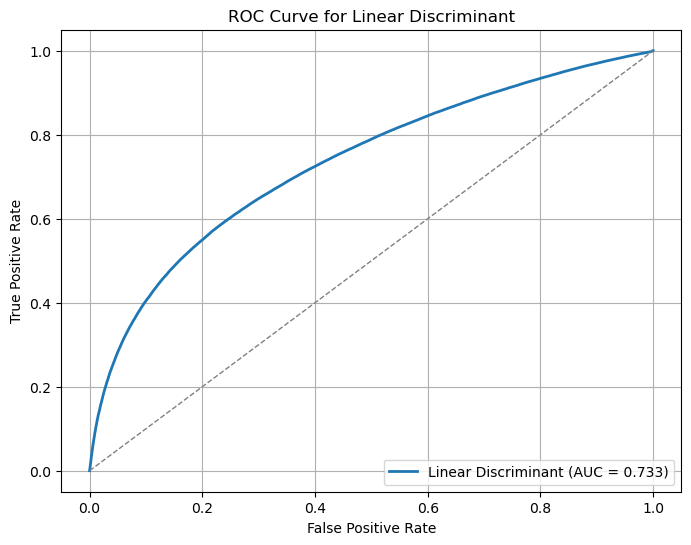

In [170]:
######### 8.3 #########
F_all = np.concatenate([F_sig, F_bkg]).flatten()
labels = np.concatenate([np.ones(len(F_sig)), np.zeros(len(F_bkg))])

fpr, tpr, _ = roc_curve(labels, F_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f"Linear Discriminant (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Linear Discriminant")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

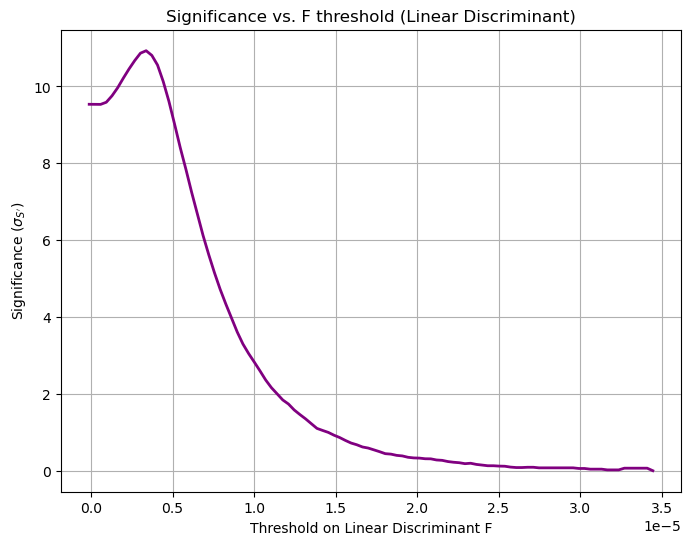

Maximum significance (approx.): 10.928177803821617


In [172]:
######### 8.4 #########
F_min, F_max = F_all.min(), F_all.max()
F_thresholds = np.linspace(F_min, F_max, 100)

def efficiency_from_F(F_vals, threshold):
    return np.sum(F_vals > threshold) / len(F_vals)

sig_eff = [efficiency_from_F(F_sig, th) for th in F_thresholds]
bkg_eff = [efficiency_from_F(F_bkg, th) for th in F_thresholds]

N_S = 1000
N_B = 10000
signif_F = []
for es, eb in zip(sig_eff, bkg_eff):
    NpS = es * N_S
    NpB = eb * N_B
    sig_val = NpS / np.sqrt(NpS + NpB) if (NpS + NpB) > 0 else 0
    signif_F.append(sig_val)

plt.figure(figsize=(8,6))
plt.plot(F_thresholds, signif_F, lw=2, color='purple')
plt.xlabel("Threshold on Linear Discriminant F")
plt.ylabel("Significance ($\\sigma_{S'}$)")
plt.title("Significance vs. F threshold (Linear Discriminant)")
plt.grid(True)
plt.show()

print("Maximum significance (approx.):", np.max(signif_F))